# Introduction to pandas

**Pandas** is a fast, powerful, flexible and easy to use open source
data analysis and manipulation tool, built on top of the Python
programming language.

Key facts
- Version 1.0.0 released on Jan 29, 2020
  - Cython & NumPy widely used as backend to speed up computations
  - As of version 1.0.0 fur some operations also Numba JIT is used to
    speed up large computations
    [_Source_](https://pandas.pydata.org/pandas-docs/stable/whatsnew/v1.0.0.html#using-numba-in-rolling-apply-and-expanding-apply)



In [1]:
# use black code formatting upon cell evaluation
%load_ext nb_black
# Imports for notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn



<IPython.core.display.Javascript object>

# Basic operation patterns


In [2]:
# Basic dataframe to work with
data_1 = {
    "Category1": ["A"] * 1 + ["B"] * 2 + ["C"] * 3,
    "Category2": [1, 2] * 3,
    "Data1": range(6),
}
frame_1 = pd.DataFrame(data_1)
frame_1

Category1  Category2  Data1
0         A          1      0
1         B          2      1
2         B          1      2
3         C          2      3
4         C          1      4
5         C          2      5

<IPython.core.display.Javascript object>

In [3]:
data_2 = {
    "Category1": ["A"] * 3 + ["C"] * 2 + ["D"] * 1,
    "Category2": [1, 2, 3] * 2,
    "Data2": np.hstack([[1, 2, 3], [8, 9], [10]]),
    "Metadata": pd.to_datetime(["2020-04-{}".format(i) for i in range(1, 7)]),
}
frame_2 = pd.DataFrame(data_2)
frame_2

Category1  Category2  Data2   Metadata
0         A          1      1 2020-04-01
1         A          2      2 2020-04-02
2         A          3      3 2020-04-03
3         C          1      8 2020-04-04
4         C          2      9 2020-04-05
5         D          3     10 2020-04-06

<IPython.core.display.Javascript object>

## Merge operations

Merges combines columns of several dataframes. For most applications it's important that we merge on columns which are present 2 times. Missing values should be extended with NaN/NaTs.

In [4]:
# per default the "inner" join method will be used, which will only use columns where the same key is
# present in both frames
combined_frame = frame_1.merge(frame_2, on=["Category1", "Category2"])
combined_frame

Category1  Category2  Data1  Data2   Metadata
0         A          1      0      1 2020-04-01
1         C          2      3      9 2020-04-05
2         C          2      5      9 2020-04-05
3         C          1      4      8 2020-04-04

<IPython.core.display.Javascript object>

In [5]:
combined_frame = frame_1.merge(frame_2, on=["Category1", "Category2"], how="left")
print(combined_frame)
combined_frame = frame_1.merge(frame_2, on=["Category1", "Category2"], how="right")
print(combined_frame)
combined_frame = frame_1.merge(frame_2, on=["Category1", "Category2"], how="outer")
print(combined_frame)

  Category1  Category2  Data1  Data2   Metadata
0         A          1      0    1.0 2020-04-01
1         B          2      1    NaN        NaT
2         B          1      2    NaN        NaT
3         C          2      3    9.0 2020-04-05
4         C          1      4    8.0 2020-04-04
5         C          2      5    9.0 2020-04-05
  Category1  Category2  Data1  Data2   Metadata
0         A          1    0.0      1 2020-04-01
1         A          2    NaN      2 2020-04-02
2         A          3    NaN      3 2020-04-03
3         C          1    4.0      8 2020-04-04
4         C          2    3.0      9 2020-04-05
5         C          2    5.0      9 2020-04-05
6         D          3    NaN     10 2020-04-06
  Category1  Category2  Data1  Data2   Metadata
0         A          1    0.0    1.0 2020-04-01
1         B          2    1.0    NaN        NaT
2         B          1    2.0    NaN        NaT
3         C          2    3.0    9.0 2020-04-05
4         C          2    5.0    9.0 202

<IPython.core.display.Javascript object>

In [6]:
combined_frame = frame_1.merge(frame_2, on=["Category1", "Category2"], how="outer")
combined_frame.fillna(0.0, inplace=True)
combined_frame

Category1  Category2  Data1  Data2             Metadata
0         A          1    0.0    1.0  2020-04-01 00:00:00
1         B          2    1.0    0.0                  0.0
2         B          1    2.0    0.0                  0.0
3         C          2    3.0    9.0  2020-04-05 00:00:00
4         C          2    5.0    9.0  2020-04-05 00:00:00
5         C          1    4.0    8.0  2020-04-04 00:00:00
6         A          2    0.0    2.0  2020-04-02 00:00:00
7         A          3    0.0    3.0  2020-04-03 00:00:00
8         D          3    0.0   10.0  2020-04-06 00:00:00

<IPython.core.display.Javascript object>

Most of the time, we have a series of observations from 2 dataframes, we simply want to add the observations as new columns to a common frame. Then we should join on all common columns.

In [7]:
data_1 = {
    "Category1": ["A"] * 1 + ["B"] * 2 + ["C"] * 3,
    "Category2": [1, 2] * 3,
    "Data": range(6),
}
frame_1 = pd.DataFrame(data_1)

data_2 = {
    "Category1": ["A"] * 3 + ["C"] * 2 + ["D"] * 1,
    "Category2": [1, 2, 3] * 2,
    "Data": np.hstack([[1, 2, 3], [8, 9], [10]]),
}
frame_2 = pd.DataFrame(data_2)

combined_frame = frame_1.merge(frame_2, on=["Category1", "Category2"], how="outer")
combined_frame

Category1  Category2  Data_x  Data_y
0         A          1     0.0     1.0
1         B          2     1.0     NaN
2         B          1     2.0     NaN
3         C          2     3.0     9.0
4         C          2     5.0     9.0
5         C          1     4.0     8.0
6         A          2     NaN     2.0
7         A          3     NaN     3.0
8         D          3     NaN    10.0

<IPython.core.display.Javascript object>

In [8]:
data_1 = {
    "Category1": ["A"] * 1 + ["B"] * 2 + ["C"] * 3,
    "Category2": [1, 2] * 3,
    "Data1": range(6),
}
frame_1 = pd.DataFrame(data_1)

data_2 = {
    "Category1": ["A"] * 3 + ["C"] * 2 + ["D"] * 1,
    "Category2": [1, 2, 3] * 2,
    "Data2": np.hstack([[1, 2, 3], [8, 9], [10]]),
    "Metadata": pd.to_datetime(["2020-04-{}".format(i) for i in range(1, 7)]),
}
frame_2 = pd.DataFrame(data_2)

common_columns = frame_1.columns.intersection(
    frame_2.columns
)  # alternatively frame_1.columns & frame_2.columns
print(common_columns)

combined_frame = frame_1.merge(frame_2, on=common_columns.to_list(), how="outer")
combined_frame

Index(['Category1', 'Category2'], dtype='object')


Category1  Category2  Data1  Data2   Metadata
0         A          1    0.0    1.0 2020-04-01
1         B          2    1.0    NaN        NaT
2         B          1    2.0    NaN        NaT
3         C          2    3.0    9.0 2020-04-05
4         C          2    5.0    9.0 2020-04-05
5         C          1    4.0    8.0 2020-04-04
6         A          2    NaN    2.0 2020-04-02
7         A          3    NaN    3.0 2020-04-03
8         D          3    NaN   10.0 2020-04-06

<IPython.core.display.Javascript object>

## Concatenation

Appends rows below

In [9]:
measurement_1 = pd.DataFrame(
    {
        "Date": pd.to_datetime(["2020-04-{}".format(i) for i in range(1, 6)]),
        "Data": range(5),
    }
)
measurement_2 = pd.DataFrame(
    {
        "Date": pd.to_datetime(["2020-04-{}".format(i) for i in [1] + [3, 4, 5, 6]]),
        "Data": range(5),
    }
)
combined_measurements = pd.concat([measurement_1, measurement_2])
combined_measurements

Date  Data
0 2020-04-01     0
1 2020-04-02     1
2 2020-04-03     2
3 2020-04-04     3
4 2020-04-05     4
0 2020-04-01     0
1 2020-04-03     1
2 2020-04-04     2
3 2020-04-05     3
4 2020-04-06     4

<IPython.core.display.Javascript object>

In [10]:
combined_measurements.reset_index(drop=True)

Date  Data
0 2020-04-01     0
1 2020-04-02     1
2 2020-04-03     2
3 2020-04-04     3
4 2020-04-05     4
5 2020-04-01     0
6 2020-04-03     1
7 2020-04-04     2
8 2020-04-05     3
9 2020-04-06     4

<IPython.core.display.Javascript object>

## Groupby mechanics

Basic pattern for operating with pandas data frames follows the same pattern

* Split
 * Filter rows with unique index
* Apply
 * Apply a function on the subindices
* Combine
 * Combine to a common frame again


In [11]:
df = pd.DataFrame(
    {
        "Key": ["A", "B", "C"] * 3,
        "Value": [i + 3 * j for i in range(3) for j in range(3)],
    }
)
df

Key  Value
0   A      0
1   B      3
2   C      6
3   A      1
4   B      4
5   C      7
6   A      2
7   B      5
8   C      8

<IPython.core.display.Javascript object>

In [12]:
for unique_key, sub_frame in df.groupby("Key"):
    print(unique_key)
    print(sub_frame)

A
  Key  Value
0   A      0
3   A      1
6   A      2
B
  Key  Value
1   B      3
4   B      4
7   B      5
C
  Key  Value
2   C      6
5   C      7
8   C      8


<IPython.core.display.Javascript object>

### Example: Get largest value for each key

In [13]:
def get_top_value_per_index(frame):
    largest_val_frame = []
    # split
    for _, sub_frame in frame.groupby("Key"):
        # apply
        largest_val_frame.append(
            sub_frame.sort_values(by="Value", ascending=False).head(1)
        )
    # combine
    largest_val_frame = pd.concat(largest_val_frame)
    return largest_val_frame


%timeit get_top_value_per_index(df)
get_top_value_per_index(df)

2.41 ms ± 806 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Key  Value
6   A      2
7   B      5
8   C      8

<IPython.core.display.Javascript object>

In [14]:
# a little bit more elegantly, but is it faster?
def get_top_value_per_index2(frame):
    return df.groupby("Key")["Value"].max()


%timeit get_top_value_per_index2(df)
get_top_value_per_index2(df)

640 µs ± 150 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Key
A    2
B    5
C    8
Name: Value, dtype: int64

<IPython.core.display.Javascript object>

# Examples with COVID-19 data

COVID-19 infections ([_European Centre for Disease Prevention and Control_](https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide), accessed on Apr 5, 2020)

In [15]:
infection_frame = pd.read_csv("Corona_data.csv", parse_dates=["dateRep"])
infection_frame

dateRep  day  month  year  cases  deaths countriesAndTerritories  \
0    2020-05-04    5      4  2020     35       1             Afghanistan   
1    2020-04-04    4      4  2020      0       0             Afghanistan   
2    2020-03-04    3      4  2020     43       0             Afghanistan   
3    2020-02-04    2      4  2020     26       0             Afghanistan   
4    2020-01-04    1      4  2020     25       0             Afghanistan   
...         ...  ...    ...   ...    ...     ...                     ...   
8900 2020-03-25   25      3  2020      0       0                Zimbabwe   
8901 2020-03-24   24      3  2020      0       1                Zimbabwe   
8902 2020-03-23   23      3  2020      0       0                Zimbabwe   
8903 2020-03-22   22      3  2020      1       0                Zimbabwe   
8904 2020-03-21   21      3  2020      1       0                Zimbabwe   

     geoId countryterritoryCode  popData2018  
0       AF                  AFG   37172386.0  
1       AF                  AFG   37172386.0  
2       AF                  AFG   37172386.0  
3       AF                  AFG   37172386.0  
4       AF                  AFG   37172386.0  
...    ...                  ...          ...  
8900    ZW                  ZWE   14439018.0  
8901    ZW                  ZWE   14439018.0  
8902    ZW                  ZWE   14439018.0  
8903    ZW                  ZWE   14439018.0  
8904    ZW                  ZWE   14439018.0  

[8905 rows x 10 columns]

<IPython.core.display.Javascript object>

COVID-19 tests per day (from [_Our world in Data_](blob:https://ourworldindata.org/882a9009-4dd0-412b-8d08-46c290ecc6f3))

In [16]:
test_frame = pd.read_csv("full-list-covid-19-tests-per-day.csv", parse_dates=["Date"])
test_frame


Entity  Code       Date  \
0                 Australia - units unclear   NaN 2020-04-03   
1                   Austria - units unclear   NaN 2020-02-26   
2                   Austria - units unclear   NaN 2020-02-27   
3                   Austria - units unclear   NaN 2020-02-28   
4                   Austria - units unclear   NaN 2020-02-29   
..                                      ...   ...        ...   
661  United States - specimens tested (CDC)   NaN 2020-03-21   
662  United States - specimens tested (CDC)   NaN 2020-03-22   
663  United States - specimens tested (CDC)   NaN 2020-03-23   
664  United States - specimens tested (CDC)   NaN 2020-03-24   
665  United States - specimens tested (CDC)   NaN 2020-03-25   

     Daily change in cumulative total tests  
0                                     16278  
1                                       103  
2                                       126  
3                                       316  
4                                       886  
..                                      ...  
661                                    5394  
662                                    4743  
663                                    8658  
664                                    8429  
665                                    8540  

[666 rows x 4 columns]

<IPython.core.display.Javascript object>

In [17]:
austria_test_frame = test_frame[test_frame.Entity.str.contains("Austria")]
austria_test_frame

Entity  Code       Date  \
1   Austria - units unclear   NaN 2020-02-26   
2   Austria - units unclear   NaN 2020-02-27   
3   Austria - units unclear   NaN 2020-02-28   
4   Austria - units unclear   NaN 2020-02-29   
5   Austria - units unclear   NaN 2020-03-04   
6   Austria - units unclear   NaN 2020-03-05   
7   Austria - units unclear   NaN 2020-03-06   
8   Austria - units unclear   NaN 2020-03-07   
9   Austria - units unclear   NaN 2020-03-08   
10  Austria - units unclear   NaN 2020-03-09   
11  Austria - units unclear   NaN 2020-03-10   
12  Austria - units unclear   NaN 2020-03-11   
13  Austria - units unclear   NaN 2020-03-12   
14  Austria - units unclear   NaN 2020-03-13   
15  Austria - units unclear   NaN 2020-03-14   
16  Austria - units unclear   NaN 2020-03-15   
17  Austria - units unclear   NaN 2020-03-16   
18  Austria - units unclear   NaN 2020-03-17   
19  Austria - units unclear   NaN 2020-03-18   
20  Austria - units unclear   NaN 2020-03-19   
21  Austria - units unclear   NaN 2020-03-20   
22  Austria - units unclear   NaN 2020-03-21   
23  Austria - units unclear   NaN 2020-03-22   
24  Austria - units unclear   NaN 2020-03-23   
25  Austria - units unclear   NaN 2020-03-24   
26  Austria - units unclear   NaN 2020-03-25   
27  Austria - units unclear   NaN 2020-03-26   
28  Austria - units unclear   NaN 2020-03-27   
29  Austria - units unclear   NaN 2020-03-28   
30  Austria - units unclear   NaN 2020-03-29   
31  Austria - units unclear   NaN 2020-03-30   
32  Austria - units unclear   NaN 2020-03-31   
33  Austria - units unclear   NaN 2020-04-01   
34  Austria - units unclear   NaN 2020-04-02   
35  Austria - units unclear   NaN 2020-04-03   
36  Austria - units unclear   NaN 2020-04-04   

    Daily change in cumulative total tests  
1                                      103  
2                                      126  
3                                      316  
4                                      886  
5                                      455  
6                                      573  
7                                      289  
8                                      308  
9                                      201  
10                                     225  
11                                     292  
12                                     336  
13                                     507  
14                                     713  
15                                     885  
16                                     700  
17                                     323  
18                                    1788  
19                                    1699  
20                                    1747  
21                                    1889  
22                                    2932  
23                                    2823  
24                                    2061  
25                                    4962  
26                                    4016  
27                                    3588  
28                                    3557  
29                                    3198  
30                                    3691  
31                                    3014  
32                                    2889  
33                                    3519  
34                                   36327  
35                                    6153  
36                                    5791

<IPython.core.display.Javascript object>

In [18]:
austria_test_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 1 to 36
Data columns (total 4 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Entity                                  36 non-null     object        
 1   Code                                    0 non-null      float64       
 2   Date                                    36 non-null     datetime64[ns]
 3   Daily change in cumulative total tests  36 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 1.4+ KB


<IPython.core.display.Javascript object>

# Often used cleanup operations

* Apply functions on data
* Convert data to other format


In [19]:
# axis=1 applied for each row
# inplace returns result, can be e.g. used in an assignment as
#  consolidated_frame = austria_test_frame.apply(lambda row: ..., axis=1,inplace=False)
# no inplace assignment possible
austria_test_frame["Entity"] = austria_test_frame.apply(
    lambda row: row.Entity.strip().split("-")[0], axis=1
)
austria_test_frame

<ipython-input-19-3a6bfcf194a4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  austria_test_frame["Entity"] = austria_test_frame.apply(


Entity  Code       Date  Daily change in cumulative total tests
1   Austria    NaN 2020-02-26                                     103
2   Austria    NaN 2020-02-27                                     126
3   Austria    NaN 2020-02-28                                     316
4   Austria    NaN 2020-02-29                                     886
5   Austria    NaN 2020-03-04                                     455
6   Austria    NaN 2020-03-05                                     573
7   Austria    NaN 2020-03-06                                     289
8   Austria    NaN 2020-03-07                                     308
9   Austria    NaN 2020-03-08                                     201
10  Austria    NaN 2020-03-09                                     225
11  Austria    NaN 2020-03-10                                     292
12  Austria    NaN 2020-03-11                                     336
13  Austria    NaN 2020-03-12                                     507
14  Austria    NaN 2020-03-13                                     713
15  Austria    NaN 2020-03-14                                     885
16  Austria    NaN 2020-03-15                                     700
17  Austria    NaN 2020-03-16                                     323
18  Austria    NaN 2020-03-17                                    1788
19  Austria    NaN 2020-03-18                                    1699
20  Austria    NaN 2020-03-19                                    1747
21  Austria    NaN 2020-03-20                                    1889
22  Austria    NaN 2020-03-21                                    2932
23  Austria    NaN 2020-03-22                                    2823
24  Austria    NaN 2020-03-23                                    2061
25  Austria    NaN 2020-03-24                                    4962
26  Austria    NaN 2020-03-25                                    4016
27  Austria    NaN 2020-03-26                                    3588
28  Austria    NaN 2020-03-27                                    3557
29  Austria    NaN 2020-03-28                                    3198
30  Austria    NaN 2020-03-29                                    3691
31  Austria    NaN 2020-03-30                                    3014
32  Austria    NaN 2020-03-31                                    2889
33  Austria    NaN 2020-04-01                                    3519
34  Austria    NaN 2020-04-02                                   36327
35  Austria    NaN 2020-04-03                                    6153
36  Austria    NaN 2020-04-04                                    5791

<IPython.core.display.Javascript object>

Hmmm, here we already see that we should have been more careful.

If we want to do write access to the frame, we shouldn't have
made a careless assignment, where we only created a view of the
entire frame

In [20]:
# now an explicit copy is created
austria_test_frame = test_frame[test_frame.Entity.str.contains("Austria")].copy()
austria_test_frame

Entity  Code       Date  \
1   Austria - units unclear   NaN 2020-02-26   
2   Austria - units unclear   NaN 2020-02-27   
3   Austria - units unclear   NaN 2020-02-28   
4   Austria - units unclear   NaN 2020-02-29   
5   Austria - units unclear   NaN 2020-03-04   
6   Austria - units unclear   NaN 2020-03-05   
7   Austria - units unclear   NaN 2020-03-06   
8   Austria - units unclear   NaN 2020-03-07   
9   Austria - units unclear   NaN 2020-03-08   
10  Austria - units unclear   NaN 2020-03-09   
11  Austria - units unclear   NaN 2020-03-10   
12  Austria - units unclear   NaN 2020-03-11   
13  Austria - units unclear   NaN 2020-03-12   
14  Austria - units unclear   NaN 2020-03-13   
15  Austria - units unclear   NaN 2020-03-14   
16  Austria - units unclear   NaN 2020-03-15   
17  Austria - units unclear   NaN 2020-03-16   
18  Austria - units unclear   NaN 2020-03-17   
19  Austria - units unclear   NaN 2020-03-18   
20  Austria - units unclear   NaN 2020-03-19   
21  Austria - units unclear   NaN 2020-03-20   
22  Austria - units unclear   NaN 2020-03-21   
23  Austria - units unclear   NaN 2020-03-22   
24  Austria - units unclear   NaN 2020-03-23   
25  Austria - units unclear   NaN 2020-03-24   
26  Austria - units unclear   NaN 2020-03-25   
27  Austria - units unclear   NaN 2020-03-26   
28  Austria - units unclear   NaN 2020-03-27   
29  Austria - units unclear   NaN 2020-03-28   
30  Austria - units unclear   NaN 2020-03-29   
31  Austria - units unclear   NaN 2020-03-30   
32  Austria - units unclear   NaN 2020-03-31   
33  Austria - units unclear   NaN 2020-04-01   
34  Austria - units unclear   NaN 2020-04-02   
35  Austria - units unclear   NaN 2020-04-03   
36  Austria - units unclear   NaN 2020-04-04   

    Daily change in cumulative total tests  
1                                      103  
2                                      126  
3                                      316  
4                                      886  
5                                      455  
6                                      573  
7                                      289  
8                                      308  
9                                      201  
10                                     225  
11                                     292  
12                                     336  
13                                     507  
14                                     713  
15                                     885  
16                                     700  
17                                     323  
18                                    1788  
19                                    1699  
20                                    1747  
21                                    1889  
22                                    2932  
23                                    2823  
24                                    2061  
25                                    4962  
26                                    4016  
27                                    3588  
28                                    3557  
29                                    3198  
30                                    3691  
31                                    3014  
32                                    2889  
33                                    3519  
34                                   36327  
35                                    6153  
36                                    5791

<IPython.core.display.Javascript object>

In [21]:
# again execute the same command as above
austria_test_frame["Entity"] = austria_test_frame.apply(
    lambda row: row.Entity.replace("- units unclear", ""), axis=1
)
austria_test_frame

Entity  Code       Date  Daily change in cumulative total tests
1   Austria    NaN 2020-02-26                                     103
2   Austria    NaN 2020-02-27                                     126
3   Austria    NaN 2020-02-28                                     316
4   Austria    NaN 2020-02-29                                     886
5   Austria    NaN 2020-03-04                                     455
6   Austria    NaN 2020-03-05                                     573
7   Austria    NaN 2020-03-06                                     289
8   Austria    NaN 2020-03-07                                     308
9   Austria    NaN 2020-03-08                                     201
10  Austria    NaN 2020-03-09                                     225
11  Austria    NaN 2020-03-10                                     292
12  Austria    NaN 2020-03-11                                     336
13  Austria    NaN 2020-03-12                                     507
14  Austria    NaN 2020-03-13                                     713
15  Austria    NaN 2020-03-14                                     885
16  Austria    NaN 2020-03-15                                     700
17  Austria    NaN 2020-03-16                                     323
18  Austria    NaN 2020-03-17                                    1788
19  Austria    NaN 2020-03-18                                    1699
20  Austria    NaN 2020-03-19                                    1747
21  Austria    NaN 2020-03-20                                    1889
22  Austria    NaN 2020-03-21                                    2932
23  Austria    NaN 2020-03-22                                    2823
24  Austria    NaN 2020-03-23                                    2061
25  Austria    NaN 2020-03-24                                    4962
26  Austria    NaN 2020-03-25                                    4016
27  Austria    NaN 2020-03-26                                    3588
28  Austria    NaN 2020-03-27                                    3557
29  Austria    NaN 2020-03-28                                    3198
30  Austria    NaN 2020-03-29                                    3691
31  Austria    NaN 2020-03-30                                    3014
32  Austria    NaN 2020-03-31                                    2889
33  Austria    NaN 2020-04-01                                    3519
34  Austria    NaN 2020-04-02                                   36327
35  Austria    NaN 2020-04-03                                    6153
36  Austria    NaN 2020-04-04                                    5791

<IPython.core.display.Javascript object>

In [22]:
austria_test_frame.Date = austria_test_frame.Date.astype(str)
austria_test_frame.Date = pd.to_datetime(austria_test_frame.Date)
austria_test_frame

Entity  Code       Date  Daily change in cumulative total tests
1   Austria    NaN 2020-02-26                                     103
2   Austria    NaN 2020-02-27                                     126
3   Austria    NaN 2020-02-28                                     316
4   Austria    NaN 2020-02-29                                     886
5   Austria    NaN 2020-03-04                                     455
6   Austria    NaN 2020-03-05                                     573
7   Austria    NaN 2020-03-06                                     289
8   Austria    NaN 2020-03-07                                     308
9   Austria    NaN 2020-03-08                                     201
10  Austria    NaN 2020-03-09                                     225
11  Austria    NaN 2020-03-10                                     292
12  Austria    NaN 2020-03-11                                     336
13  Austria    NaN 2020-03-12                                     507
14  Austria    NaN 2020-03-13                                     713
15  Austria    NaN 2020-03-14                                     885
16  Austria    NaN 2020-03-15                                     700
17  Austria    NaN 2020-03-16                                     323
18  Austria    NaN 2020-03-17                                    1788
19  Austria    NaN 2020-03-18                                    1699
20  Austria    NaN 2020-03-19                                    1747
21  Austria    NaN 2020-03-20                                    1889
22  Austria    NaN 2020-03-21                                    2932
23  Austria    NaN 2020-03-22                                    2823
24  Austria    NaN 2020-03-23                                    2061
25  Austria    NaN 2020-03-24                                    4962
26  Austria    NaN 2020-03-25                                    4016
27  Austria    NaN 2020-03-26                                    3588
28  Austria    NaN 2020-03-27                                    3557
29  Austria    NaN 2020-03-28                                    3198
30  Austria    NaN 2020-03-29                                    3691
31  Austria    NaN 2020-03-30                                    3014
32  Austria    NaN 2020-03-31                                    2889
33  Austria    NaN 2020-04-01                                    3519
34  Austria    NaN 2020-04-02                                   36327
35  Austria    NaN 2020-04-03                                    6153
36  Austria    NaN 2020-04-04                                    5791

<IPython.core.display.Javascript object>

In [23]:
austria_test_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 1 to 36
Data columns (total 4 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Entity                                  36 non-null     object        
 1   Code                                    0 non-null      float64       
 2   Date                                    36 non-null     datetime64[ns]
 3   Daily change in cumulative total tests  36 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 1.4+ KB


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Date'>

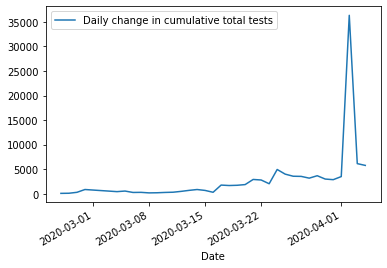

<IPython.core.display.Javascript object>

In [24]:
austria_test_frame.plot(x="Date", y="Daily change in cumulative total tests")

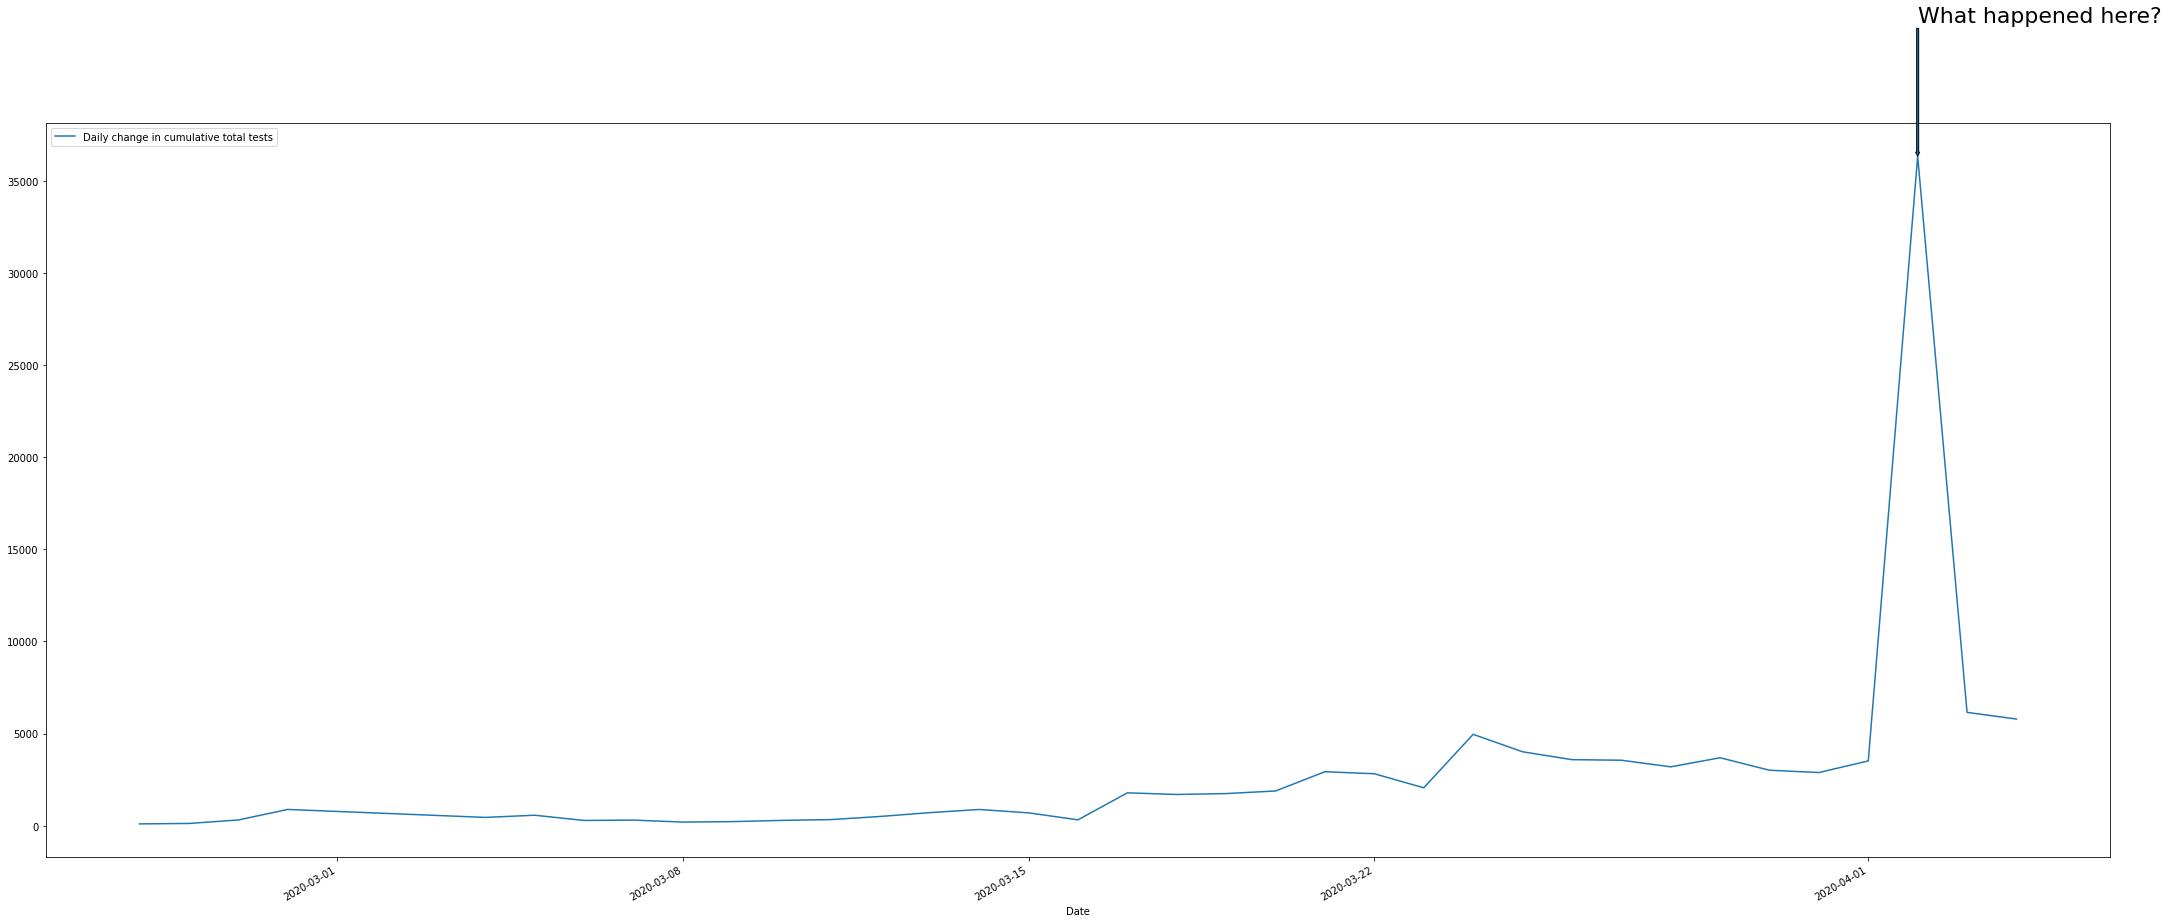

<IPython.core.display.Javascript object>

In [25]:
_, ax = plt.subplots(figsize=(37, 15))
austria_test_frame.plot(x="Date", y="Daily change in cumulative total tests", ax=ax)
austria_daily_change = austria_test_frame["Daily change in cumulative total tests"]
# austria_daily_change.idxmax() does not work with iloc, as it actually returns the *pandas* index
# of the row in the dataframe rather than the index itself, as the index starts counting at 1, this
# does not work *sigh*, this is only contained in the docu of pd.Series but not pd.DataFrame
peak_index = austria_daily_change.argmax()
peak_date = austria_test_frame["Date"].iloc[peak_index]
peak_tests = austria_daily_change.iloc[peak_index]
ax.annotate(
    "What happened here?",
    xy=(peak_date, peak_tests),
    xycoords="data",
    xytext=(peak_date, 1.2 * peak_tests),
    textcoords="data",
    arrowprops=dict(width=2, headwidth=4, headlength=4),
    fontsize=22,
)
ax.legend(loc="upper left")

In [26]:
test_frame["Entity"].unique()


array(['Australia - units unclear', 'Austria - units unclear',
       'Bahrain - units unclear', 'Belgium - tests performed',
       'Canada - people tested', 'Denmark - people tested',
       'Ecuador - samples tested', 'Estonia - units unclear',
       'France - units unclear', 'Iceland - units unclear',
       'India - people tested', 'India - samples tested',
       'Indonesia - units unclear', 'Italy - units unclear',
       'Japan - people tested',
       'Lithuania - number of samples analyzed to date',
       'Malaysia - cases tested', 'Netherlands - people tested',
       'Pakistan - tests performed', 'Philippines - cases tested',
       'South Korea - cases tested', 'Thailand - people tested',
       'Turkey - units unclear', 'United Kingdom - people tested',
       'United States - inconsistent units (COVID Tracking Project)',
       'United States - specimens tested (CDC)'], dtype=object)

<IPython.core.display.Javascript object>

In [27]:
# explicitly specify plot size that we can see something
_, ax = plt.subplots(figsize=(45, 30))
ax.tick_params(axis="x", labelsize=25)
ax.tick_params(axis="y", labelsize=25)
# take the first 5 countries from the frame
countries_sample = test_frame.Entity.unique()[:5]
countries_test_sample_frame = test_frame[test_frame.Entity.isin(countries_sample)]
countries_test_sample_frame.boxplot(
    "Daily change in cumulative total tests", by="Entity", ax=ax
)

<AxesSubplot:title={'center':'Daily change in cumulative total tests'}, xlabel='Entity'>

<IPython.core.display.Javascript object>

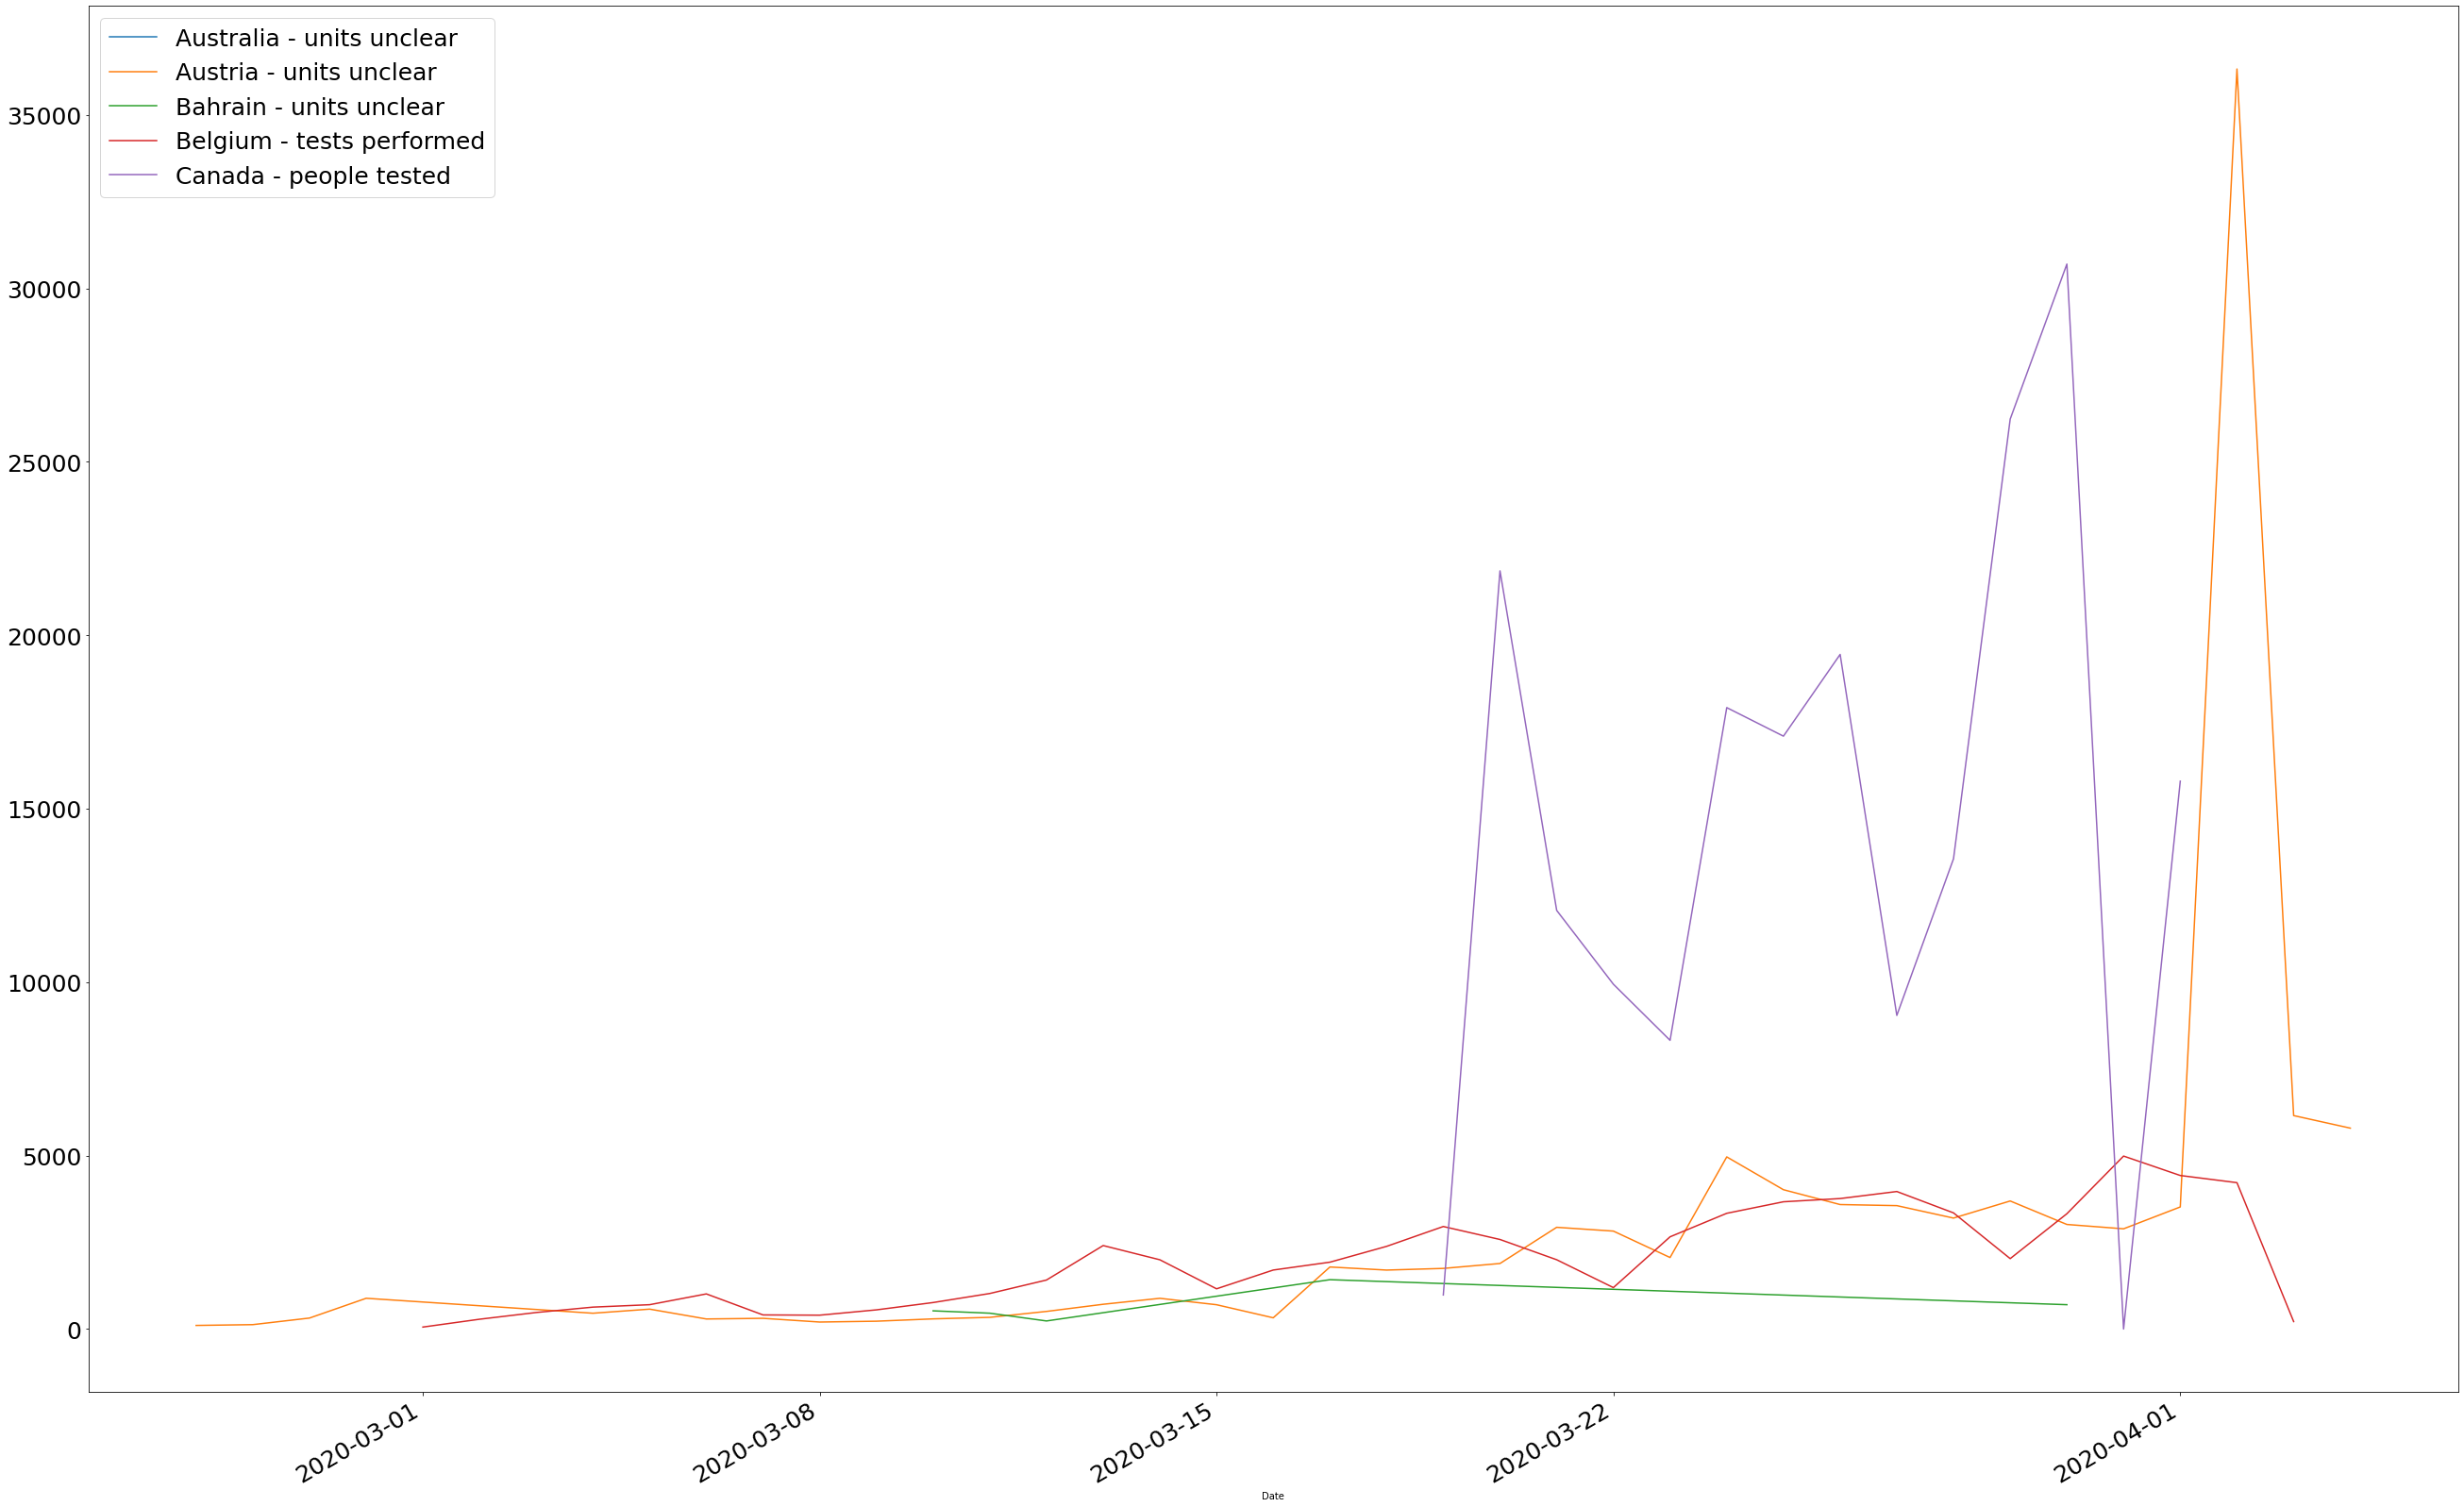

<IPython.core.display.Javascript object>

In [28]:
_, ax = plt.subplots(figsize=(45, 30))
for country, sub_frame in countries_test_sample_frame.groupby("Entity"):
    sub_frame.plot(
        y="Daily change in cumulative total tests",
        x="Date",
        ax=ax,
        label=country,
        fontsize=25,
    )
    ax.legend(prop=dict(size=25))

Entity
Australia - units unclear       AxesSubplot(0.125,0.2;0.775x0.68)
Austria - units unclear         AxesSubplot(0.125,0.2;0.775x0.68)
Bahrain - units unclear         AxesSubplot(0.125,0.2;0.775x0.68)
Belgium - tests performed    AxesSubplot(0.125,0.125;0.775x0.755)
Canada - people tested       AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

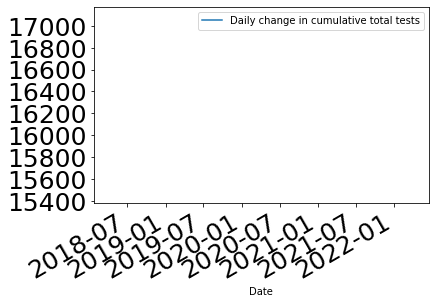

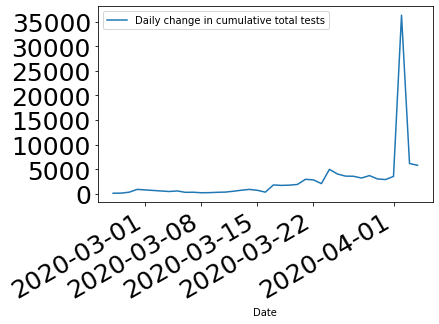

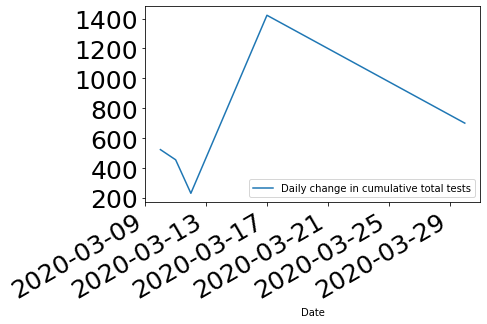

<IPython.core.display.Javascript object>

In [29]:
countries_test_sample_frame.groupby("Entity").plot(
    y="Daily change in cumulative total tests", x="Date", fontsize=25
)

Dates are missing from the time series. This is due to the
wrong type of the data - we have just converted the values
in the Austrian test frame before. Thus we need to re-cast
the datatype of the Date-column. We will also check which
method seems to be fast to use.

In [30]:
countries_test_sample_frame["Date"] = countries_test_sample_frame.Date.astype(str)
countries_test_sample_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 0 to 89
Data columns (total 4 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Entity                                  90 non-null     object 
 1   Code                                    0 non-null      float64
 2   Date                                    90 non-null     object 
 3   Daily change in cumulative total tests  90 non-null     int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 3.5+ KB


<ipython-input-30-2aa1235e04ac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries_test_sample_frame["Date"] = countries_test_sample_frame.Date.astype(str)


<IPython.core.display.Javascript object>

In [31]:
%timeit countries_test_sample_frame.Date.astype(np.datetime64)

406 µs ± 68.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


<IPython.core.display.Javascript object>

In [32]:
%timeit pd.to_datetime(countries_test_sample_frame.Date)

301 µs ± 26.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


<IPython.core.display.Javascript object>

In [33]:
# take the first 5 countries from the frame
countries_sample = test_frame.Entity.unique()[:5]
countries_test_sample_frame = test_frame[test_frame.Entity.isin(countries_sample)].copy()
countries_test_sample_frame.Date = pd.to_datetime(countries_test_sample_frame.Date)
countries_test_sample_frame.Date.dtype


dtype('<M8[ns]')

<IPython.core.display.Javascript object>

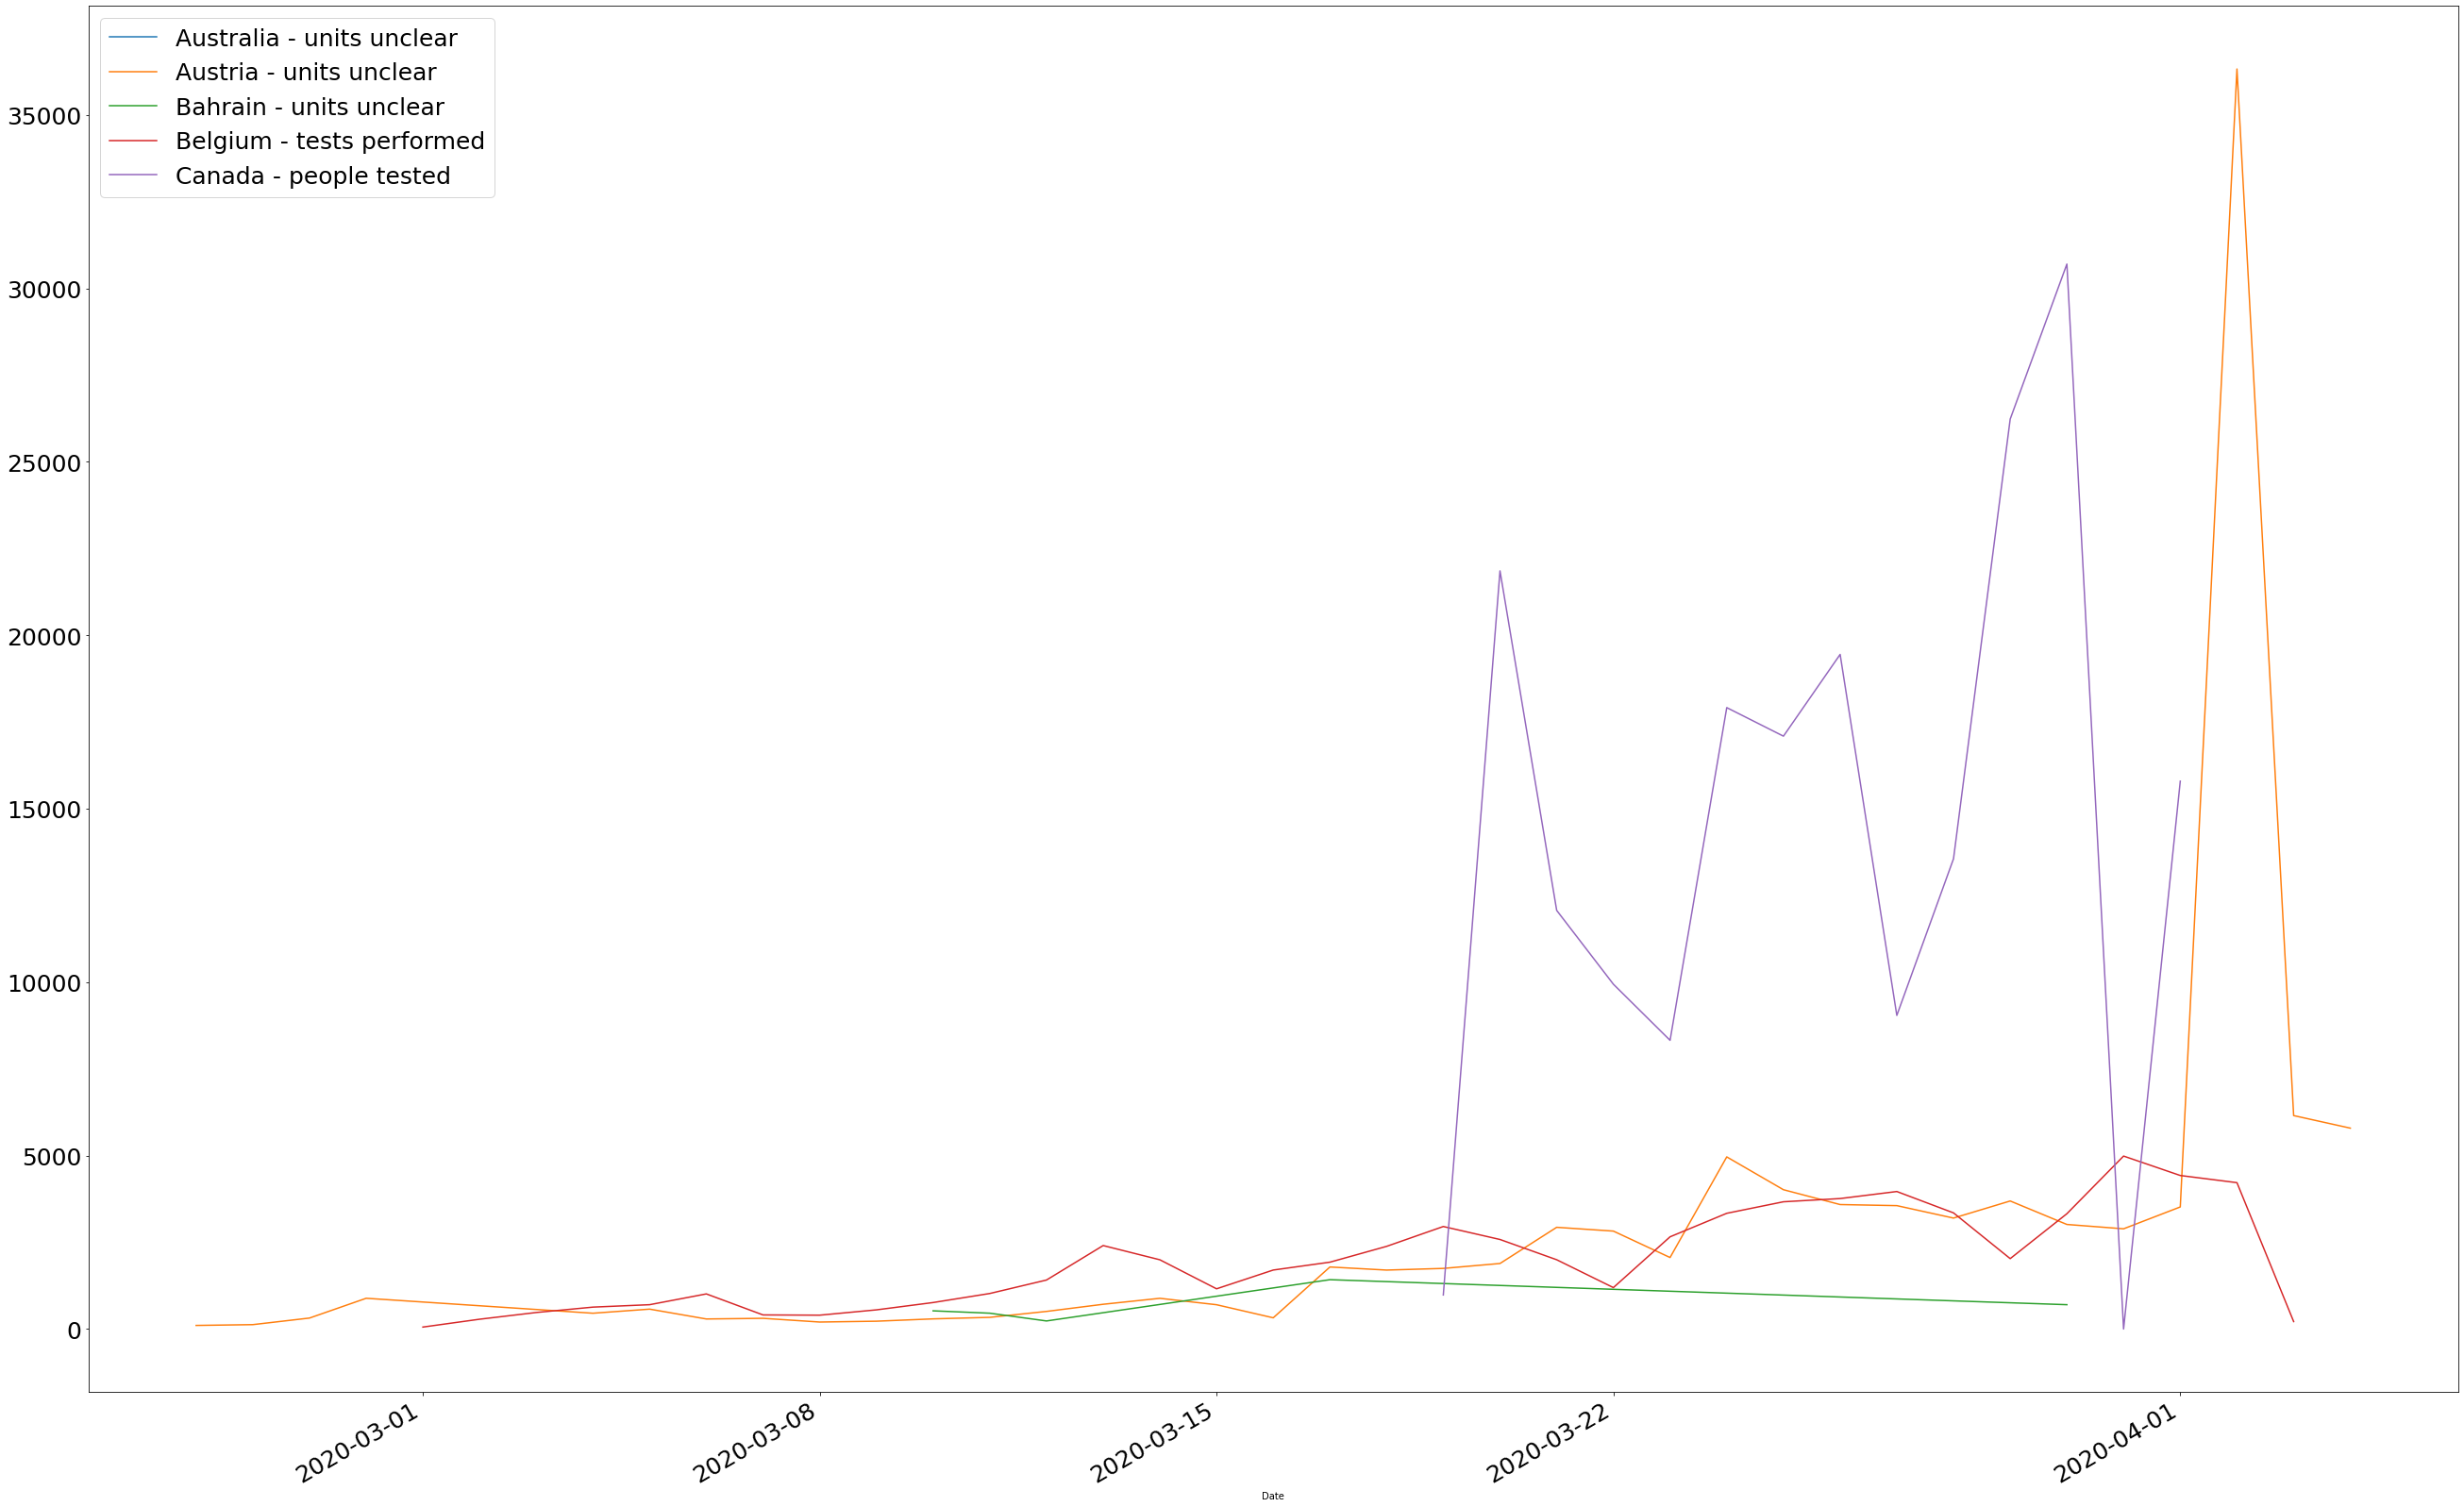

<IPython.core.display.Javascript object>

In [34]:
fig, ax = plt.subplots(figsize=(45, 30))
ax.tick_params(axis="x", labelsize=25)
ax.tick_params(axis="y", labelsize=25)
for country, sub_frame in countries_test_sample_frame.groupby("Entity"):
    sub_frame.plot(
        y="Daily change in cumulative total tests", x="Date", ax=ax, label=country
    )
    ax.legend(prop=dict(size=25))

# Merge operations and concatenations

Now let's merge the Frame of the tests & the output for the infections


In [35]:
infection_frame["Date"] = pd.to_datetime(infection_frame["dateRep"])
infection_frame

dateRep  day  month  year  cases  deaths countriesAndTerritories  \
0    2020-05-04    5      4  2020     35       1             Afghanistan   
1    2020-04-04    4      4  2020      0       0             Afghanistan   
2    2020-03-04    3      4  2020     43       0             Afghanistan   
3    2020-02-04    2      4  2020     26       0             Afghanistan   
4    2020-01-04    1      4  2020     25       0             Afghanistan   
...         ...  ...    ...   ...    ...     ...                     ...   
8900 2020-03-25   25      3  2020      0       0                Zimbabwe   
8901 2020-03-24   24      3  2020      0       1                Zimbabwe   
8902 2020-03-23   23      3  2020      0       0                Zimbabwe   
8903 2020-03-22   22      3  2020      1       0                Zimbabwe   
8904 2020-03-21   21      3  2020      1       0                Zimbabwe   

     geoId countryterritoryCode  popData2018       Date  
0       AF                  AFG   37172386.0 2020-05-04  
1       AF                  AFG   37172386.0 2020-04-04  
2       AF                  AFG   37172386.0 2020-03-04  
3       AF                  AFG   37172386.0 2020-02-04  
4       AF                  AFG   37172386.0 2020-01-04  
...    ...                  ...          ...        ...  
8900    ZW                  ZWE   14439018.0 2020-03-25  
8901    ZW                  ZWE   14439018.0 2020-03-24  
8902    ZW                  ZWE   14439018.0 2020-03-23  
8903    ZW                  ZWE   14439018.0 2020-03-22  
8904    ZW                  ZWE   14439018.0 2020-03-21  

[8905 rows x 11 columns]

<IPython.core.display.Javascript object>

In [36]:
test_frame

Entity  Code       Date  \
0                 Australia - units unclear   NaN 2020-04-03   
1                   Austria - units unclear   NaN 2020-02-26   
2                   Austria - units unclear   NaN 2020-02-27   
3                   Austria - units unclear   NaN 2020-02-28   
4                   Austria - units unclear   NaN 2020-02-29   
..                                      ...   ...        ...   
661  United States - specimens tested (CDC)   NaN 2020-03-21   
662  United States - specimens tested (CDC)   NaN 2020-03-22   
663  United States - specimens tested (CDC)   NaN 2020-03-23   
664  United States - specimens tested (CDC)   NaN 2020-03-24   
665  United States - specimens tested (CDC)   NaN 2020-03-25   

     Daily change in cumulative total tests  
0                                     16278  
1                                       103  
2                                       126  
3                                       316  
4                                       886  
..                                      ...  
661                                    5394  
662                                    4743  
663                                    8658  
664                                    8429  
665                                    8540  

[666 rows x 4 columns]

<IPython.core.display.Javascript object>

In [37]:
# clean up test frame and make comparable rows
test_frame["countriesAndTerritories"] = test_frame["Entity"].apply(
    lambda row: row.replace(" ", "").split("-")[0]
)
test_frame["Date"] = pd.to_datetime(test_frame["Date"])
austria_test_frame = test_frame[test_frame["countriesAndTerritories"] == "Austria"]
austria_test_frame

Entity  Code       Date  \
1   Austria - units unclear   NaN 2020-02-26   
2   Austria - units unclear   NaN 2020-02-27   
3   Austria - units unclear   NaN 2020-02-28   
4   Austria - units unclear   NaN 2020-02-29   
5   Austria - units unclear   NaN 2020-03-04   
6   Austria - units unclear   NaN 2020-03-05   
7   Austria - units unclear   NaN 2020-03-06   
8   Austria - units unclear   NaN 2020-03-07   
9   Austria - units unclear   NaN 2020-03-08   
10  Austria - units unclear   NaN 2020-03-09   
11  Austria - units unclear   NaN 2020-03-10   
12  Austria - units unclear   NaN 2020-03-11   
13  Austria - units unclear   NaN 2020-03-12   
14  Austria - units unclear   NaN 2020-03-13   
15  Austria - units unclear   NaN 2020-03-14   
16  Austria - units unclear   NaN 2020-03-15   
17  Austria - units unclear   NaN 2020-03-16   
18  Austria - units unclear   NaN 2020-03-17   
19  Austria - units unclear   NaN 2020-03-18   
20  Austria - units unclear   NaN 2020-03-19   
21  Austria - units unclear   NaN 2020-03-20   
22  Austria - units unclear   NaN 2020-03-21   
23  Austria - units unclear   NaN 2020-03-22   
24  Austria - units unclear   NaN 2020-03-23   
25  Austria - units unclear   NaN 2020-03-24   
26  Austria - units unclear   NaN 2020-03-25   
27  Austria - units unclear   NaN 2020-03-26   
28  Austria - units unclear   NaN 2020-03-27   
29  Austria - units unclear   NaN 2020-03-28   
30  Austria - units unclear   NaN 2020-03-29   
31  Austria - units unclear   NaN 2020-03-30   
32  Austria - units unclear   NaN 2020-03-31   
33  Austria - units unclear   NaN 2020-04-01   
34  Austria - units unclear   NaN 2020-04-02   
35  Austria - units unclear   NaN 2020-04-03   
36  Austria - units unclear   NaN 2020-04-04   

    Daily change in cumulative total tests countriesAndTerritories  
1                                      103                 Austria  
2                                      126                 Austria  
3                                      316                 Austria  
4                                      886                 Austria  
5                                      455                 Austria  
6                                      573                 Austria  
7                                      289                 Austria  
8                                      308                 Austria  
9                                      201                 Austria  
10                                     225                 Austria  
11                                     292                 Austria  
12                                     336                 Austria  
13                                     507                 Austria  
14                                     713                 Austria  
15                                     885                 Austria  
16                                     700                 Austria  
17                                     323                 Austria  
18                                    1788                 Austria  
19                                    1699                 Austria  
20                                    1747                 Austria  
21                                    1889                 Austria  
22                                    2932                 Austria  
23                                    2823                 Austria  
24                                    2061                 Austria  
25                                    4962                 Austria  
26                                    4016                 Austria  
27                                    3588                 Austria  
28                                    3557                 Austria  
29                                    3198                 Austria  
30                                    3691                 Austria  
31                                    3014                 Austria  
32                                  

<IPython.core.display.Javascript object>

In [38]:
austria_infection_frame = infection_frame[
    infection_frame.countriesAndTerritories == "Austria"
]
austria_infection_frame

dateRep  day  month  year  cases  deaths countriesAndTerritories geoId  \
501 2020-05-04    5      4  2020    241      18                 Austria    AT   
502 2020-04-04    4      4  2020    396      10                 Austria    AT   
503 2020-03-04    3      4  2020    418      12                 Austria    AT   
504 2020-02-04    2      4  2020    529      18                 Austria    AT   
505 2020-01-04    1      4  2020    564      20                 Austria    AT   
..         ...  ...    ...   ...    ...     ...                     ...   ...   
593 2020-04-01    4      1  2020      0       0                 Austria    AT   
594 2020-03-01    3      1  2020      0       0                 Austria    AT   
595 2020-02-01    2      1  2020      0       0                 Austria    AT   
596 2020-01-01    1      1  2020      0       0                 Austria    AT   
597 2019-12-31   31     12  2019      0       0                 Austria    AT   

    countryterritoryCode  popData2018       Date  
501                  AUT    8847037.0 2020-05-04  
502                  AUT    8847037.0 2020-04-04  
503                  AUT    8847037.0 2020-03-04  
504                  AUT    8847037.0 2020-02-04  
505                  AUT    8847037.0 2020-01-04  
..                   ...          ...        ...  
593                  AUT    8847037.0 2020-04-01  
594                  AUT    8847037.0 2020-03-01  
595                  AUT    8847037.0 2020-02-01  
596                  AUT    8847037.0 2020-01-01  
597                  AUT    8847037.0 2019-12-31  

[97 rows x 11 columns]

<IPython.core.display.Javascript object>

In [39]:
relevant_infection_frame = austria_infection_frame[
    ["Date", "countriesAndTerritories", "popData2018", "cases", "deaths"]
]
relevant_test_frame = austria_test_frame[
    ["Date", "countriesAndTerritories", "Daily change in cumulative total tests"]
]
combined_frame = relevant_infection_frame.merge(
    relevant_test_frame, on=["Date", "countriesAndTerritories"]
)
combined_frame

Date countriesAndTerritories  popData2018  cases  deaths  \
0  2020-04-04                 Austria    8847037.0    396      10   
1  2020-03-04                 Austria    8847037.0    418      12   
2  2020-03-31                 Austria    8847037.0    805      22   
3  2020-03-30                 Austria    8847037.0    522      18   
4  2020-03-29                 Austria    8847037.0    594       0   
5  2020-03-28                 Austria    8847037.0    668      16   
6  2020-03-27                 Austria    8847037.0   1141      18   
7  2020-03-26                 Austria    8847037.0    606       4   
8  2020-03-25                 Austria    8847037.0    796       5   
9  2020-03-24                 Austria    8847037.0    855       9   
10 2020-03-23                 Austria    8847037.0    607       8   
11 2020-03-22                 Austria    8847037.0    375       2   
12 2020-03-21                 Austria    8847037.0    453       0   
13 2020-03-20                 Austria    8847037.0    550       2   
14 2020-03-19                 Austria    8847037.0    314       1   
15 2020-03-18                 Austria    8847037.0    316       0   
16 2020-03-17                 Austria    8847037.0    156       2   
17 2020-03-16                 Austria    8847037.0    205       0   
18 2020-03-15                 Austria    8847037.0    151       0   
19 2020-03-14                 Austria    8847037.0    143       0   
20 2020-03-13                 Austria    8847037.0    115       1   
21 2020-04-03                 Austria    8847037.0      6       0   
22 2020-02-29                 Austria    8847037.0      2       0   
23 2020-02-28                 Austria    8847037.0      3       0   
24 2020-02-27                 Austria    8847037.0      0       0   
25 2020-02-26                 Austria    8847037.0      2       0   
26 2020-04-02                 Austria    8847037.0      0       0   
27 2020-04-01                 Austria    8847037.0      0       0   

    Daily change in cumulative total tests  
0                                     5791  
1                                      455  
2                                     2889  
3                                     3014  
4                                     3691  
5                                     3198  
6                                     3557  
7                                     3588  
8                                     4016  
9                                     4962  
10                                    2061  
11                                    2823  
12                                    2932  
13                                    1889  
14                                    1747  
15                                    1699  
16                                    1788  
17                                     323  
18                                     700  
19                                     885  
20                                     713  
21                                    6153  
22                                     886  
23                                     316  
24                                     126  
25                                     103  
26                                   36327  
27                                    3519

<IPython.core.display.Javascript object>

In [40]:
combined_frame.plot(
    y=["cases", "deaths", "Daily change in cumulative total tests"], x="Date"
)

<AxesSubplot:xlabel='Date'>

<IPython.core.display.Javascript object>

# Visualization with Seaborn

Plotting with seaborn is slightly different, groupby operations are not really necessary, however one needs to ensure that all categories to be grouped by are contained in a single column

<AxesSubplot:xlabel='Entity', ylabel='Daily change in cumulative total tests'>

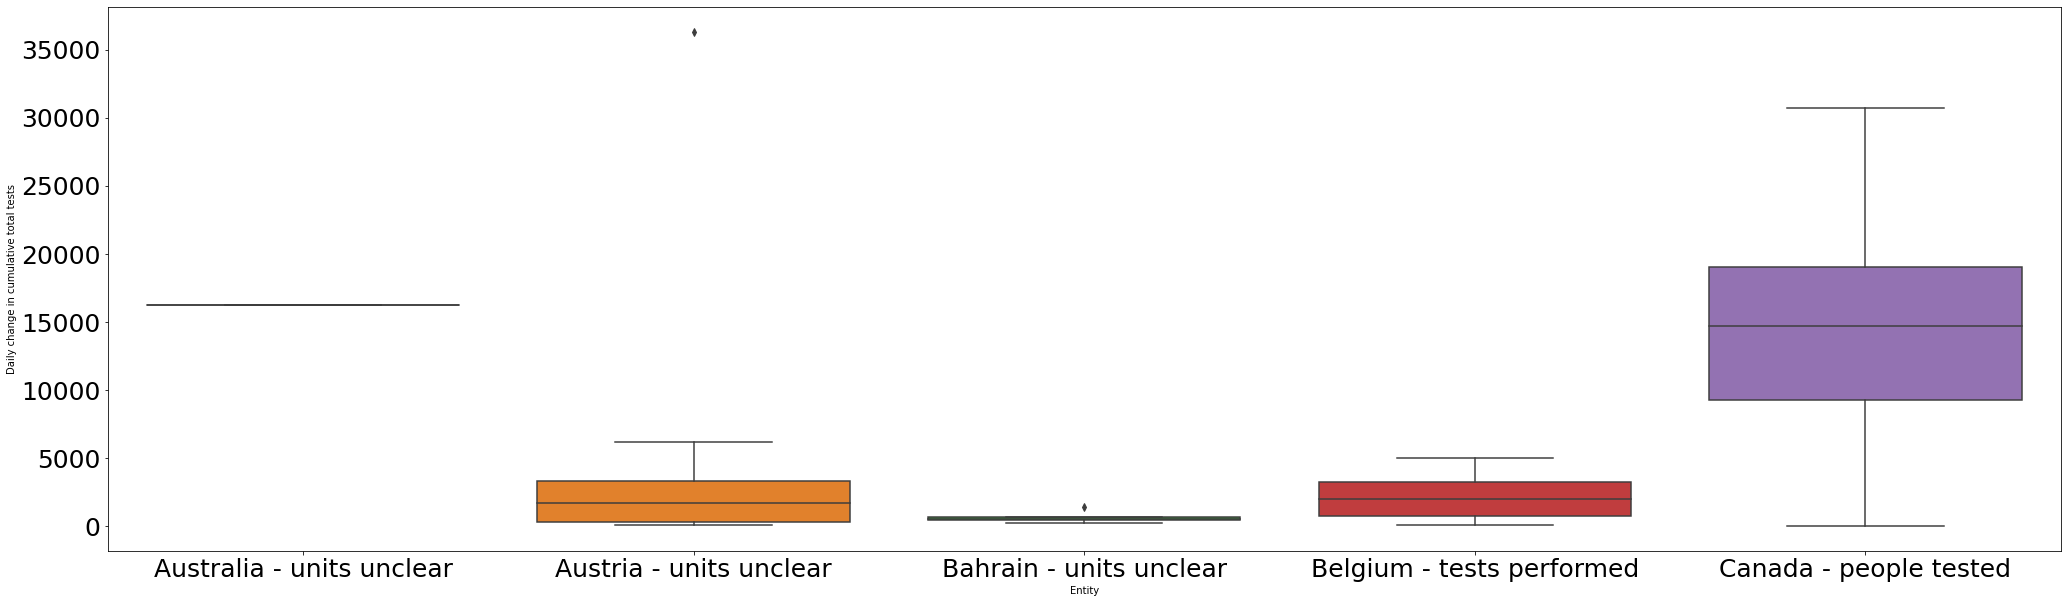

<IPython.core.display.Javascript object>

In [41]:
_, ax = plt.subplots(figsize=(35, 10))
ax.tick_params(axis="x", labelsize=25)
ax.tick_params(axis="y", labelsize=25)
# note the awkward groupby() boilerplate-code for the boxplots in matplotlib above, seaborn does it automatically
seaborn.boxplot(
    x="Entity",
    y="Daily change in cumulative total tests",
    data=countries_test_sample_frame,
    ax=ax,
)

In [42]:
_, ax = plt.subplots(figsize=(35, 10))
ax.tick_params(axis="x", labelsize=25)
ax.tick_params(axis="y", labelsize=25)
seaborn.violinplot(
    x="Entity",
    y="Daily change in cumulative total tests",
    data=countries_test_sample_frame,
    ax=ax,
)

<AxesSubplot:xlabel='Entity', ylabel='Daily change in cumulative total tests'>

<IPython.core.display.Javascript object>

We can see, that the kernel density estimator for the violin plot extended the parameter range to value which are not actually taken in the measurements, which does not even make sense, e.g. negative values.

Hence I would recommend using the cut=0 kwarg, which makes a hard cutoff that values not contained in the measurement are not extrapolated.

In [43]:
print(seaborn.violinplot.__doc__)

Draw a combination of boxplot and kernel density estimate.

A violin plot plays a similar role as a box and whisker plot. It shows the
distribution of quantitative data across several levels of one (or more)
categorical variables such that those distributions can be compared. Unlike
a box plot, in which all of the plot components correspond to actual
datapoints, the violin plot features a kernel density estimation of the
underlying distribution.

This can be an effective and attractive way to show multiple distributions
of data at once, but keep in mind that the estimation procedure is
influenced by the sample size, and violins for relatively small samples
might look misleadingly smooth.


Input data can be passed in a variety of formats, including:

- Vectors of data represented as lists, numpy arrays, or pandas Series
  objects passed directly to the ``x``, ``y``, and/or ``hue`` parameters.
- A "long-form" DataFrame, in which case the ``x``, ``y``, and ``hue``
  variables will determ

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Entity', ylabel='Daily change in cumulative total tests'>

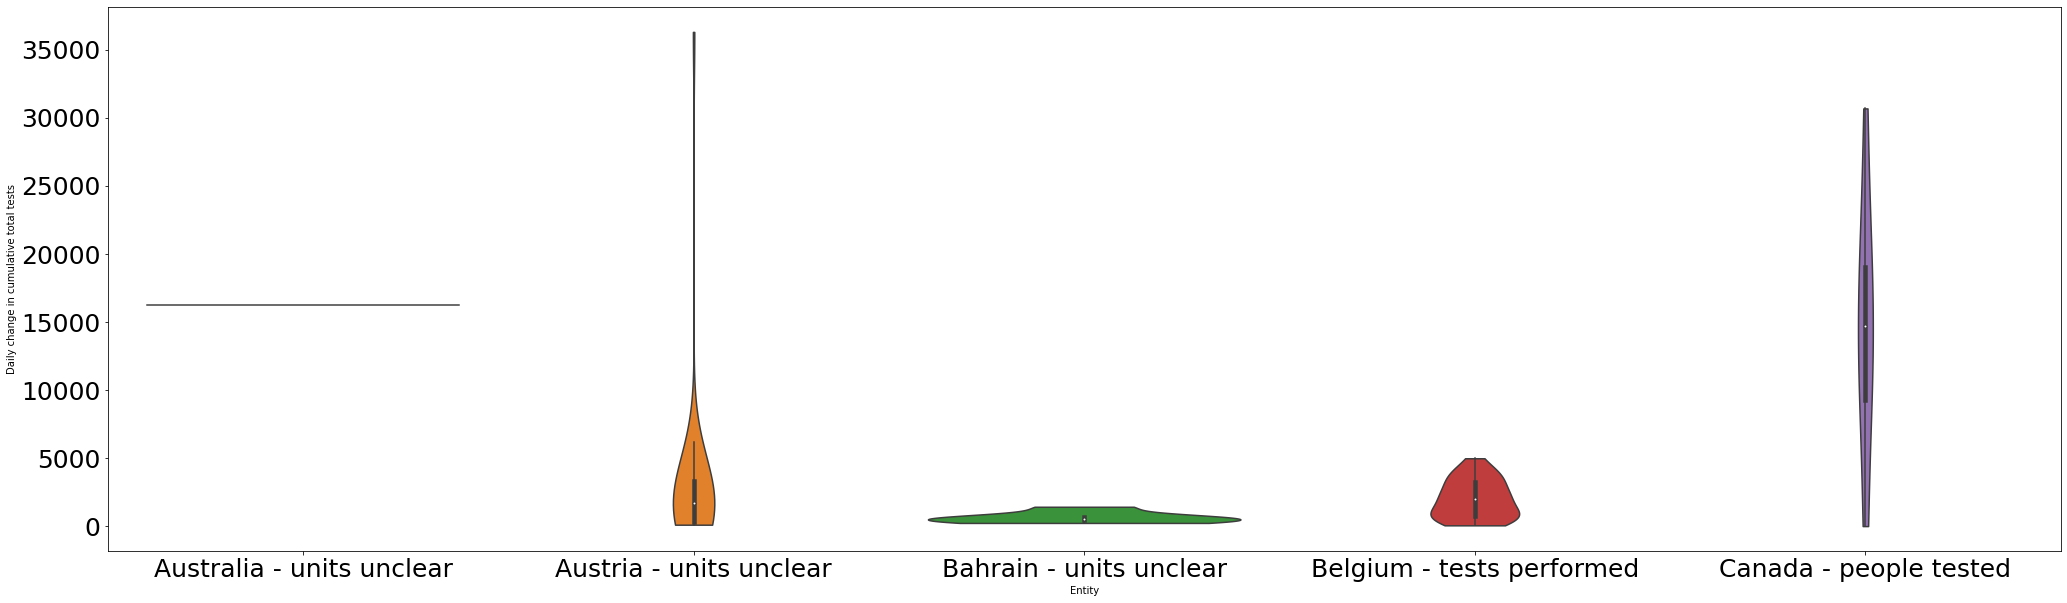

<IPython.core.display.Javascript object>

In [44]:
# now we use the cut=0 kwarg
_, ax = plt.subplots(figsize=(35, 10))
ax.tick_params(axis="x", labelsize=25)
ax.tick_params(axis="y", labelsize=25)
seaborn.violinplot(
    x="Entity",
    y="Daily change in cumulative total tests",
    data=countries_test_sample_frame,
    ax=ax,
    cut=0,
)

In [45]:
# get days since start to get numerical values for seaborn regression plot, has problems with datetime object
combined_frame["days_since_start"] = (
    combined_frame["Date"] - combined_frame["Date"].min()
).dt.days
combined_frame

Date countriesAndTerritories  popData2018  cases  deaths  \
0  2020-04-04                 Austria    8847037.0    396      10   
1  2020-03-04                 Austria    8847037.0    418      12   
2  2020-03-31                 Austria    8847037.0    805      22   
3  2020-03-30                 Austria    8847037.0    522      18   
4  2020-03-29                 Austria    8847037.0    594       0   
5  2020-03-28                 Austria    8847037.0    668      16   
6  2020-03-27                 Austria    8847037.0   1141      18   
7  2020-03-26                 Austria    8847037.0    606       4   
8  2020-03-25                 Austria    8847037.0    796       5   
9  2020-03-24                 Austria    8847037.0    855       9   
10 2020-03-23                 Austria    8847037.0    607       8   
11 2020-03-22                 Austria    8847037.0    375       2   
12 2020-03-21                 Austria    8847037.0    453       0   
13 2020-03-20                 Austria    8847037.0    550       2   
14 2020-03-19                 Austria    8847037.0    314       1   
15 2020-03-18                 Austria    8847037.0    316       0   
16 2020-03-17                 Austria    8847037.0    156       2   
17 2020-03-16                 Austria    8847037.0    205       0   
18 2020-03-15                 Austria    8847037.0    151       0   
19 2020-03-14                 Austria    8847037.0    143       0   
20 2020-03-13                 Austria    8847037.0    115       1   
21 2020-04-03                 Austria    8847037.0      6       0   
22 2020-02-29                 Austria    8847037.0      2       0   
23 2020-02-28                 Austria    8847037.0      3       0   
24 2020-02-27                 Austria    8847037.0      0       0   
25 2020-02-26                 Austria    8847037.0      2       0   
26 2020-04-02                 Austria    8847037.0      0       0   
27 2020-04-01                 Austria    8847037.0      0       0   

    Daily change in cumulative total tests  days_since_start  
0                                     5791                38  
1                                      455                 7  
2                                     2889                34  
3                                     3014                33  
4                                     3691                32  
5                                     3198                31  
6                                     3557                30  
7                                     3588                29  
8                                     4016                28  
9                                     4962                27  
10                                    2061                26  
11                                    2823                25  
12                                    2932                24  
13                                    1889                23  
14                                    1747                22  
15                                    1699                21  
16                                    1788                20  
17                                     323                19  
18                                     700                18  
19                                     885                17  
20                                     713                16  
21                                    6153                37  
22                                     886                 3  
23                                     316                 2  
24                                     126                 1  
25                                     103                 0  
26                                   36327                36  
27                                    3519                35

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='days_since_start', ylabel='deaths'>

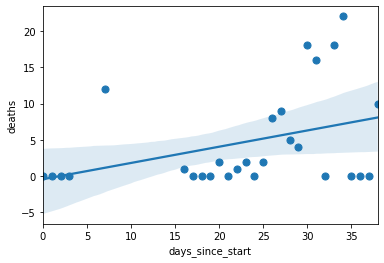

<IPython.core.display.Javascript object>

In [46]:
seaborn.regplot(
    x="days_since_start", y="deaths", data=combined_frame, x_estimator=np.median
)

In [47]:
seaborn.lmplot(
    x="days_since_start", y="cases", data=combined_frame, x_estimator=np.mean
)

<IPython.core.display.Javascript object>

## Comparison of plotting with matplotlib

* Matplotlib
 * Built-in for DataFrame & Series objects
 * Easy to plot multiple columns
 * Groupby operations awkward if you need to group entries in column by row index
* Seaborn
 * Fancy plotting themes
 * A lot of statistical visualizations not available in matplotlib (not out-of-the-box)
 * Groupby mechanics automatically built in, you can use hue- and x-y-columns to group by 2 indices
 * If you want to plot several columns at once, use have to use pd.melt-Trick

In [48]:
countries_sample = test_frame.Entity.unique()[:2]
small_sample_frame = test_frame[test_frame.Entity.isin(countries_sample)].copy()
small_sample_frame.Entity = small_sample_frame.apply(
    lambda row: row.Entity.replace(" ", "").split("-")[0], axis=1
)
small_sample_frame.rename(columns={"Entity": "Country"}, inplace=True)
small_infection_frame = infection_frame[
    infection_frame.countriesAndTerritories.isin(["Austria", "Australia"])
].copy()
small_infection_frame.rename(
    columns={"countriesAndTerritories": "Country"}, inplace=True
)
small_frame = small_infection_frame[["Country", "Date", "deaths", "cases"]].merge(
    small_sample_frame[["Country", "Date", "Daily change in cumulative total tests"]],
    on=["Country", "Date"],
    how="outer",
)
small_frame

Country       Date  deaths  cases  \
0    Australia 2020-05-04     4.0  139.0   
1    Australia 2020-04-04     7.0  324.0   
2    Australia 2020-03-04     2.0  248.0   
3    Australia 2020-02-04     1.0  269.0   
4    Australia 2020-01-04     1.0  150.0   
..         ...        ...     ...    ...   
197    Austria 2020-03-08     NaN    NaN   
198    Austria 2020-03-09     NaN    NaN   
199    Austria 2020-03-10     NaN    NaN   
200    Austria 2020-03-11     NaN    NaN   
201    Austria 2020-03-12     NaN    NaN   

     Daily change in cumulative total tests  
0                                       NaN  
1                                       NaN  
2                                       NaN  
3                                       NaN  
4                                       NaN  
..                                      ...  
197                                   201.0  
198                                   225.0  
199                                   292.0  
200                                   336.0  
201                                   507.0  

[202 rows x 5 columns]

<IPython.core.display.Javascript object>

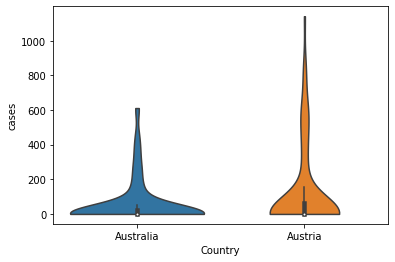

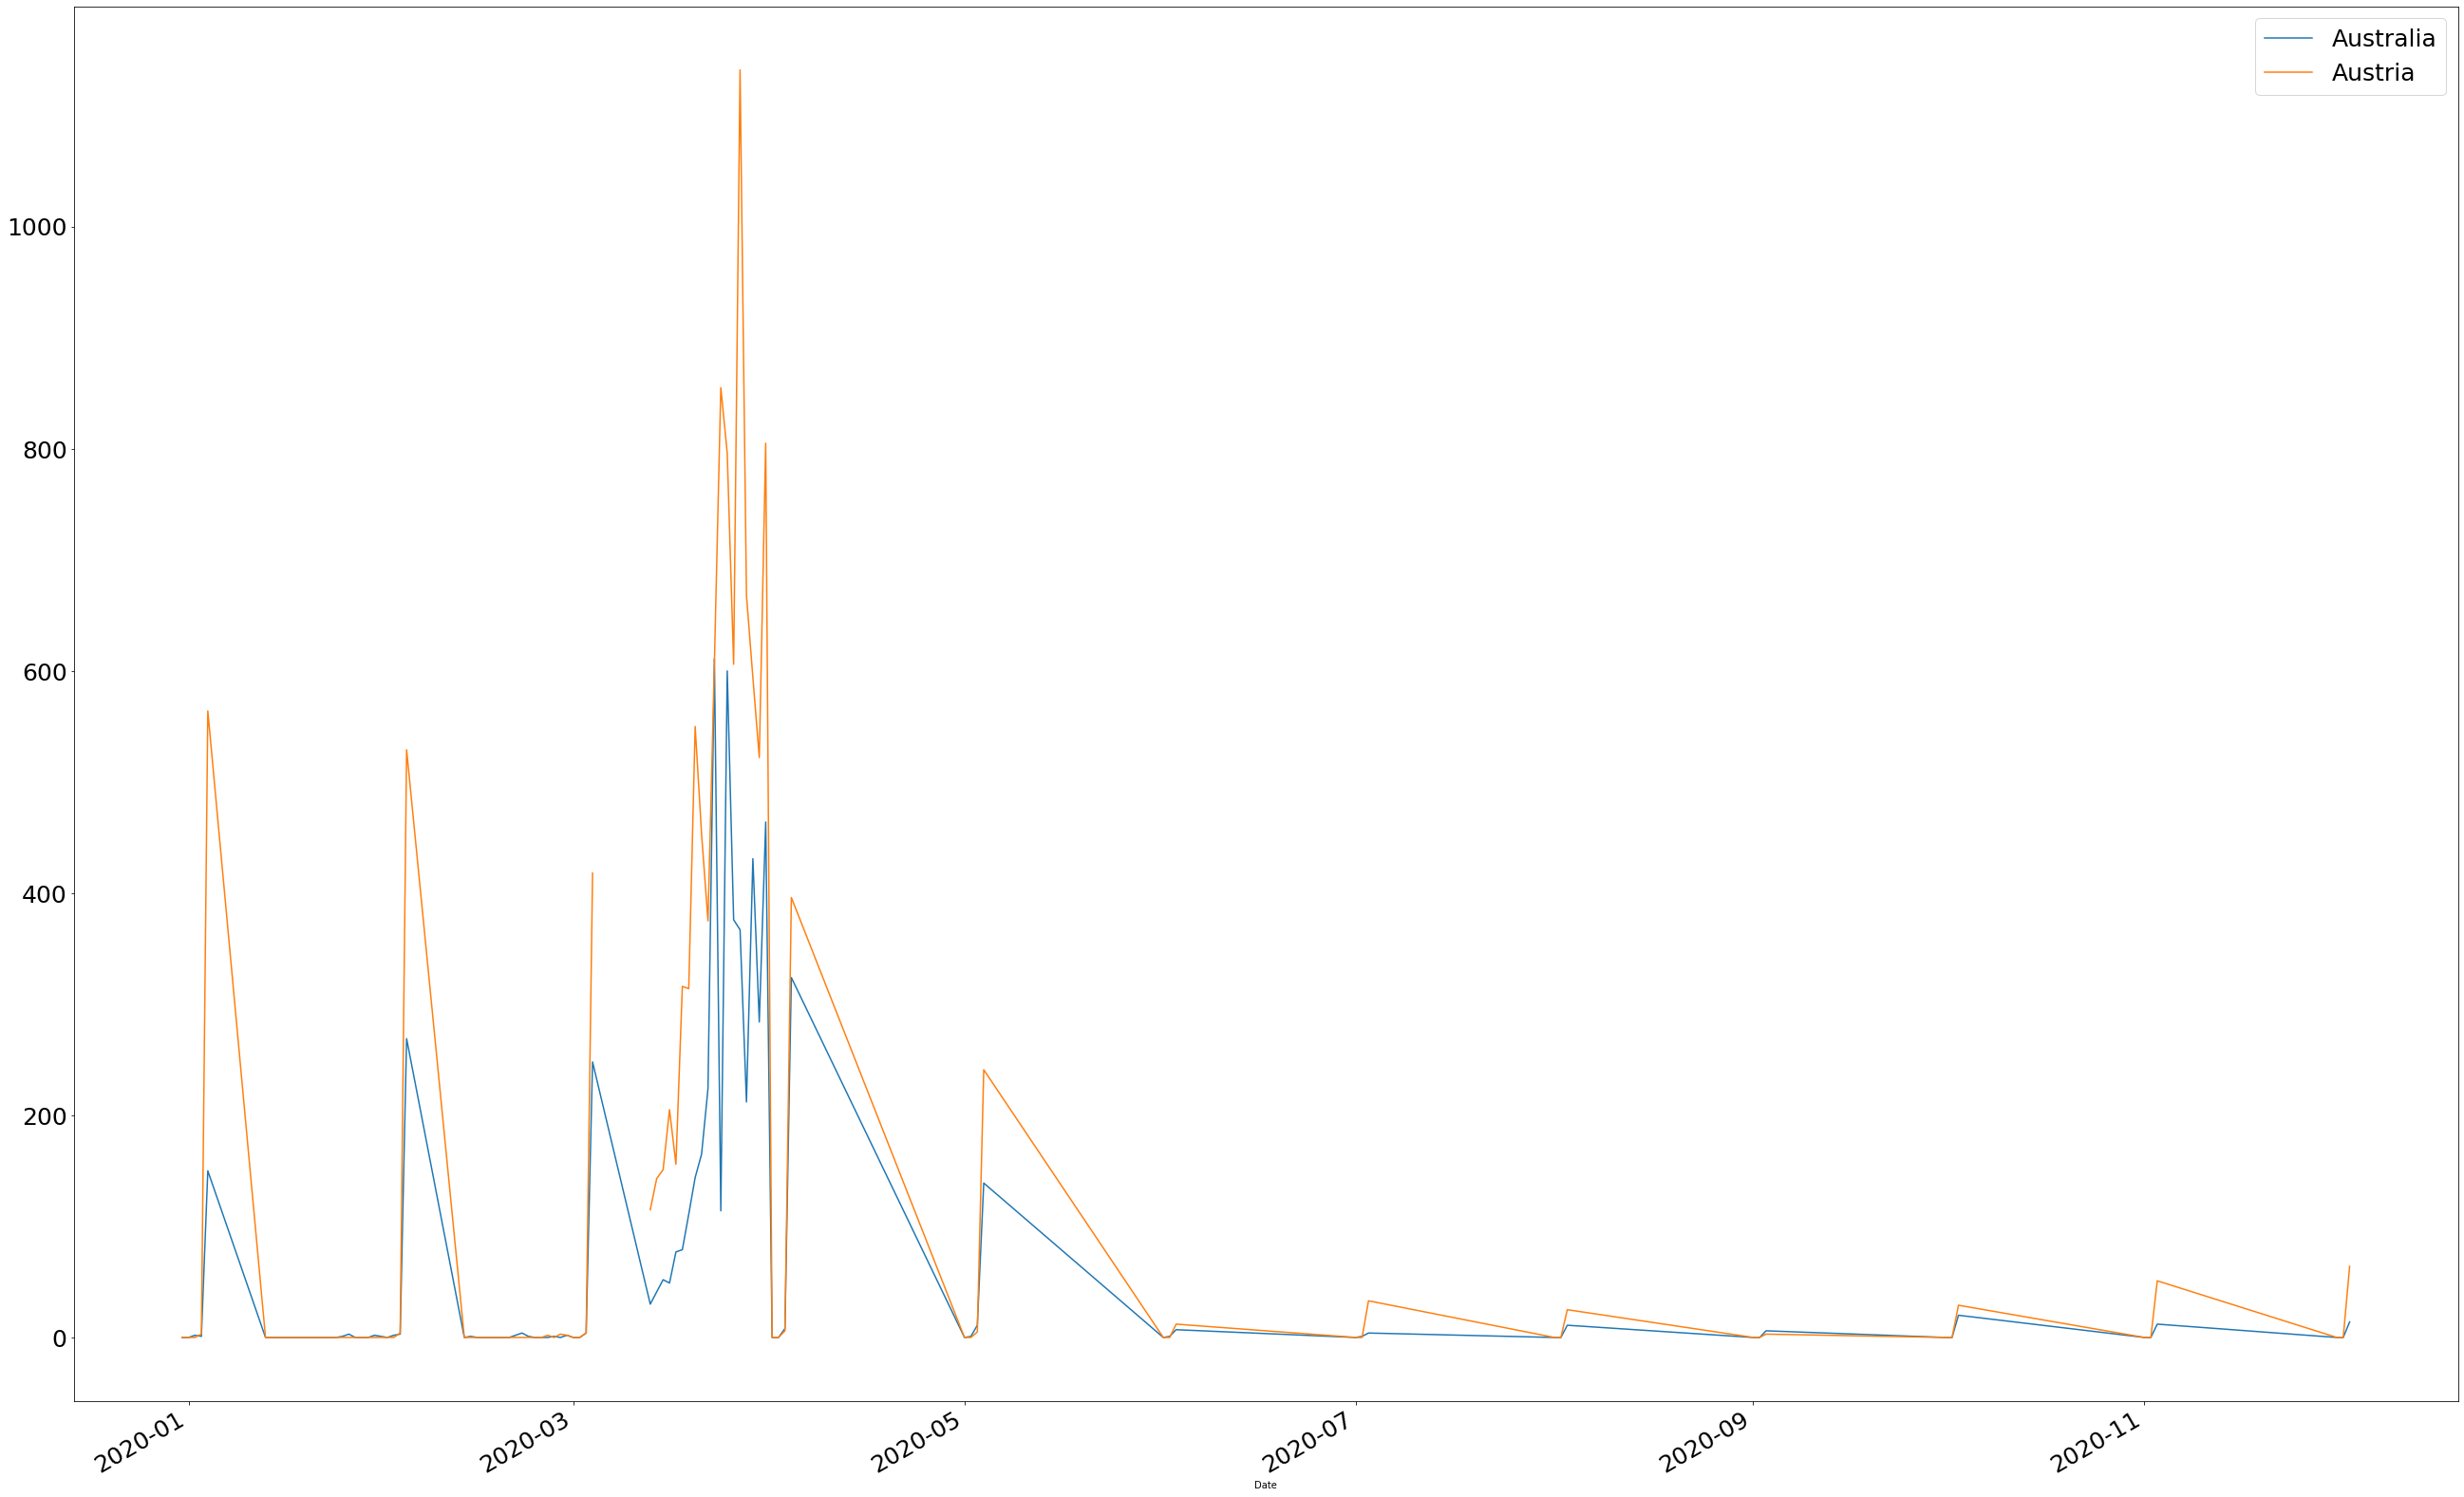

<IPython.core.display.Javascript object>

In [49]:
seaborn.violinplot(x="Country", y="cases", data=small_frame, cut=0)
fig, ax = plt.subplots(figsize=(45, 30))
ax.tick_params(axis="x", labelsize=25)
ax.tick_params(axis="y", labelsize=25)
for country, sub_frame in small_frame.groupby("Country"):
    sub_frame.plot(y="cases", x="Date", ax=ax, label=country)
    ax.legend(prop=dict(size=25))

In [50]:
melted_frame = pd.melt(
    small_frame,
    id_vars=["Country", "Date"],
    value_vars=["cases", "deaths"],
)
melted_frame

Country       Date variable  value
0    Australia 2020-05-04    cases  139.0
1    Australia 2020-04-04    cases  324.0
2    Australia 2020-03-04    cases  248.0
3    Australia 2020-02-04    cases  269.0
4    Australia 2020-01-04    cases  150.0
..         ...        ...      ...    ...
399    Austria 2020-03-08   deaths    NaN
400    Austria 2020-03-09   deaths    NaN
401    Austria 2020-03-10   deaths    NaN
402    Austria 2020-03-11   deaths    NaN
403    Austria 2020-03-12   deaths    NaN

[404 rows x 4 columns]

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Country', ylabel='value'>

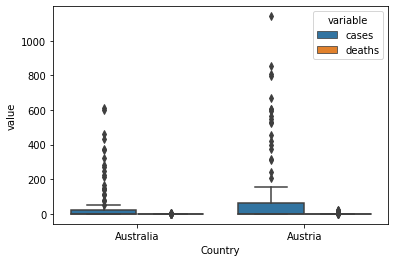

<IPython.core.display.Javascript object>

In [51]:
seaborn.boxplot(x="Country", y="value", hue="variable", data=melted_frame)

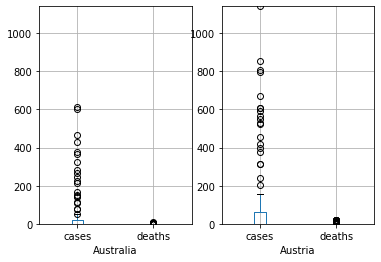

<IPython.core.display.Javascript object>

In [52]:
contained_countries = small_frame.Country.unique()
fig, ax = plt.subplots(ncols=len(contained_countries))
common_maxval = max(small_frame[["cases", "deaths"]].max())
for i, country in enumerate(contained_countries):
    sub_frame = small_frame[small_frame.Country == country]
    sub_frame.boxplot(["cases", "deaths"], ax=ax[i])
    ax[i].set_xlabel(country)
    ax[i].set_ylim([0, common_maxval])

Australia         AxesSubplot(0.1,0.15;0.363636x0.75)
Austria      AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

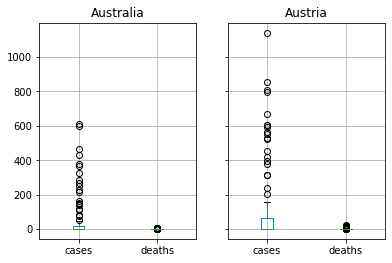

<IPython.core.display.Javascript object>

In [53]:
small_frame.groupby("Country").boxplot(column=["cases", "deaths"])

# Tips & tricks for increasing pandas performance

This has no assumption on completeness


* Use apply() over for-loops
* Try to vectorize as much as possible (using numpy ufuncs)
* Use iterrows when needing to iterate over large amounts of rows

In [54]:
frame = pd.read_csv("full-list-covid-19-tests-per-day.csv")
%timeit frame["NewEnt"] = frame.apply(lambda row: row.Entity.strip().split("-")[0], axis=1)
frame["NewEnt"] = frame.apply(lambda row: row.Entity.strip().split("-")[0], axis=1)
frame

9.8 ms ± 2.43 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


Entity  Code          Date  \
0                 Australia - units unclear   NaN   Apr 3, 2020   
1                   Austria - units unclear   NaN  Feb 26, 2020   
2                   Austria - units unclear   NaN  Feb 27, 2020   
3                   Austria - units unclear   NaN  Feb 28, 2020   
4                   Austria - units unclear   NaN  Feb 29, 2020   
..                                      ...   ...           ...   
661  United States - specimens tested (CDC)   NaN  Mar 21, 2020   
662  United States - specimens tested (CDC)   NaN  Mar 22, 2020   
663  United States - specimens tested (CDC)   NaN  Mar 23, 2020   
664  United States - specimens tested (CDC)   NaN  Mar 24, 2020   
665  United States - specimens tested (CDC)   NaN  Mar 25, 2020   

     Daily change in cumulative total tests          NewEnt  
0                                     16278      Australia   
1                                       103        Austria   
2                                       126        Austria   
3                                       316        Austria   
4                                       886        Austria   
..                                      ...             ...  
661                                    5394  United States   
662                                    4743  United States   
663                                    8658  United States   
664                                    8429  United States   
665                                    8540  United States   

[666 rows x 5 columns]

<IPython.core.display.Javascript object>

In [55]:
frame = pd.read_csv("full-list-covid-19-tests-per-day.csv")

def split_index(df):
    entity_idx = df.columns.get_loc("Entity")

    entities = []
    for row in df.itertuples(index=False):
        entities.append(row[entity_idx].strip().split("-")[0])

    df["NewEnt"] = entities

    return df

%timeit split_index(frame)
frame = split_index(frame)
frame


1.31 ms ± 204 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Entity  Code          Date  \
0                 Australia - units unclear   NaN   Apr 3, 2020   
1                   Austria - units unclear   NaN  Feb 26, 2020   
2                   Austria - units unclear   NaN  Feb 27, 2020   
3                   Austria - units unclear   NaN  Feb 28, 2020   
4                   Austria - units unclear   NaN  Feb 29, 2020   
..                                      ...   ...           ...   
661  United States - specimens tested (CDC)   NaN  Mar 21, 2020   
662  United States - specimens tested (CDC)   NaN  Mar 22, 2020   
663  United States - specimens tested (CDC)   NaN  Mar 23, 2020   
664  United States - specimens tested (CDC)   NaN  Mar 24, 2020   
665  United States - specimens tested (CDC)   NaN  Mar 25, 2020   

     Daily change in cumulative total tests          NewEnt  
0                                     16278      Australia   
1                                       103        Austria   
2                                       126        Austria   
3                                       316        Austria   
4                                       886        Austria   
..                                      ...             ...  
661                                    5394  United States   
662                                    4743  United States   
663                                    8658  United States   
664                                    8429  United States   
665                                    8540  United States   

[666 rows x 5 columns]

<IPython.core.display.Javascript object>

In [56]:
frame = pd.read_csv("performance_db_1000_jobs.csv")
frame

Unnamed: 0          job                     name              config  \
0             0  38771978771     DPC BASE_200400153_6  DPC BASE_200400153   
1             1  38794023766   DPC BASE_200400153_612  DPC BASE_200400153   
2             2  38800720741   DPC BASE_200400153_978  DPC BASE_200400153   
3             3  38805765511  DPC BASE_200400153_1465  DPC BASE_200400153   
4             4  38810066962  DPC BASE_200400153_1860  DPC BASE_200400153   
..          ...          ...                      ...                 ...   
995         995  38816229829  DPC BASE_200400153_2453  DPC BASE_200400153   
996         996  38820333808  DPC BASE_200400153_2851  DPC BASE_200400153   
997         997  38848751391  DPC BASE_200400153_3195  DPC BASE_200400153   
998         998  38852687412  DPC BASE_200400153_3584  DPC BASE_200400153   
999         999  38858858057  DPC BASE_200400153_3997  DPC BASE_200400153   

     substripe_id                    node    worker  result  vertex_count  \
0               6  gpunode01.prod.cluster  Worker06       1      46089838   
1             612  gpunode01.prod.cluster  Worker06       1      93655074   
2             978  gpunode01.prod.cluster  Worker06       1      92855589   
3            1465  gpunode01.prod.cluster  Worker06       1      92329357   
4            1860  gpunode01.prod.cluster  Worker06       1      93216260   
..            ...                     ...       ...     ...           ...   
995          2453  gpunode01.prod.cluster  Worker01       1      92230958   
996          2851  gpunode01.prod.cluster  Worker01       1      93515234   
997          3195  gpunode01.prod.cluster  Worker01       1      92983039   
998          3584  gpunode01.prod.cluster  Worker01       1      92287981   
999          3997  gpunode01.prod.cluster  Worker01       1      93106936   

        area  ...        direction  group  images  interlock  stripe_number  \
0    67108.9  ...  Direction.X_POS     G0      10          4              0   
1    67108.9  ...  Direction.X_POS     G0      10          4              5   
2    67108.9  ...  Direction.X_POS     G0      10          4              8   
3    67108.9  ...  Direction.X_POS     G0      10          4             13   
4    67108.9  ...  Direction.X_POS     G0      10          4             16   
..       ...  ...              ...    ...     ...        ...            ...   
995  67108.9  ...  Direction.X_POS     G0      10          4             22   
996  67108.9  ...  Direction.X_POS     G0      10          4             25   
997  67108.9  ...  Direction.X_POS     G0      10          4             28   
998  67108.9  ...  Direction.X_POS     G0      10          4             32   
999  67108.9  ...  Direction.X_POS     G0      10          4             36   

     TIME_IN_STARTING  TIME_IN_IMPORTING  TIME_IN_PROCESSING  \
0            3.373056          12.478222            6.169378   
1            0.000423           5.124674            1.548846   
2            0.000324           4.172506            0.853178   
3            0.000438           3.660126            0.620229   
4            0.000303           3.750020            0.329577   
..                ...                ...                 ...   
995          0.000291           3.551378            0.538153   
996          0.000366          27.949506            0.448155   
997          0.000384           3.589171            0.328923   
998          0.000470           5.831154            0.321194   
999          0.000684           8.652015            0.444293   

     TIME_IN_STREAMING  TIME_IN_IDLE  
0             0.019927      0.000004  
1             0.017113      0.000006  
2             0.014111      0.000004  
3             0.014429      0.000006  
4             0.014053      0.000004  
..                 ...           ...  
995           0.011093      0.000003  
996           0.013507      0.000006  
997           0.012421      0.000005  
998           0.011985      0.000005  
999     

<IPython.core.display.Javascript object>

In [57]:
frame["STARTING"] = pd.to_datetime(frame.STARTING, unit="us")
start_time = frame.STARTING.min()
%timeit frame.apply(lambda row: (row.STARTING - start_time).total_seconds(), axis=1)
frame.apply(lambda row: (row.STARTING - start_time).total_seconds(), axis=1)

39.5 ms ± 9.22 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


0       0.039000
1      22.083389
2      28.779998
3      33.824281
4      38.125337
         ...    
995    44.287611
996    48.391192
997    76.808431
998    80.744063
999    86.914295
Length: 1000, dtype: float64

<IPython.core.display.Javascript object>

In [58]:
%timeit (frame.STARTING - start_time).dt.total_seconds()
(frame.STARTING - start_time).dt.total_seconds()

335 µs ± 55.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


0       0.039000
1      22.083389
2      28.779998
3      33.824281
4      38.125337
         ...    
995    44.287611
996    48.391192
997    76.808431
998    80.744063
999    86.914295
Name: STARTING, Length: 1000, dtype: float64

<IPython.core.display.Javascript object>